In [1]:
from pathlib import Path 
import sys 
import pandas as pd
from functools import partial

sys.path.append('..')
from utils import*
from utils_plots import *

# interactive features
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed

# Loading results

In [3]:
folder = 'simulations_run_20250616_184805'
postprocess(folder, multizone=True)
# process_simulation_results(folder)

/Users/celia/Documents/WorldBank/Market model/CournotToyModel/market/utils.py:276: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['scenario', 'competition', 'year', 'season', 'day', 't'])


In [12]:
results_folder = Path('../output') / Path('simulations_run_20250616_184805')

SCENARIOS_RENAME = {
    'baseline': 'Baseline',
    'Contract1': 'Contract 100%',
    'Contract0p9': 'Contract 90%',
    'Contract0p8': 'Contract 80%',
    'Contract0p5': 'Contract 50%',
    'CoalDifferentiateAge': 'Coal Differentiate Age',
    'CoalDifferentiateAvail': 'Coal Differentiate Availability',
    'CoalDifferentiateEfficiency': 'Coal Differentiate SRMC',
    'EskomDifferentiate': 'Eskom Differentiate',
    'FullDifferentiate': 'Full Differentiate',
    'Elasticity0p2': 'Elasticity -0.2',
    'Elasticity0p3': 'Elasticity -0.3',
    'Elasticity0p4': 'Elasticity -0.4',
}

REGION_NAME = 'South_Africa'

dict_specs = read_plot_specs()

create_folders_imgs(results_folder)

In [13]:

epm_results = extract_simulation_folder(results_folder)
epm_results = process_outputs(epm_results, scenarios_rename=SCENARIOS_RENAME, folder=results_folder, additional_processing=True)
epm_results = process_for_labels(epm_results, dict_specs)


/Users/celia/Documents/WorldBank/Market model/CournotToyModel/market/utils.py:275: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['scenario', 'competition', 'year', 'season', 'day', 't'])


# Automatic plots

TypeError: no numeric data to plot

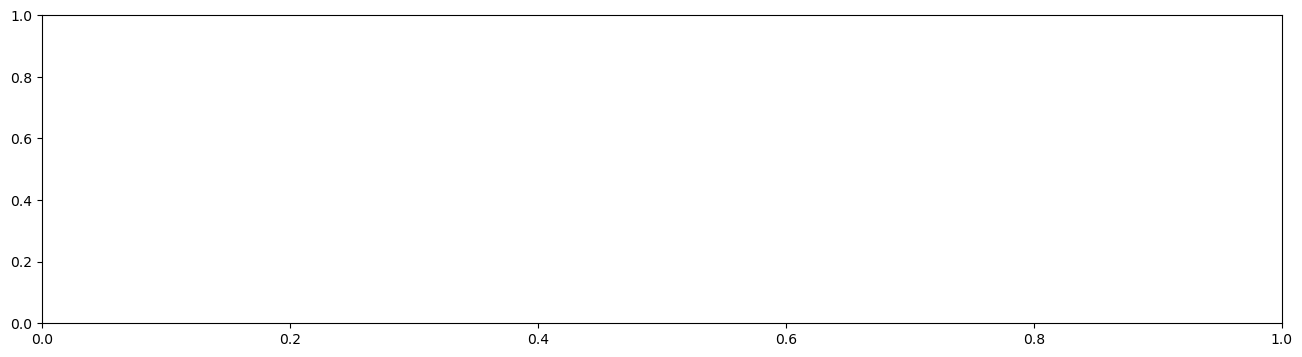

In [7]:
make_automatic_plots(epm_results, dict_specs, results_folder, scenarios_to_remove = None)

# Additional plots

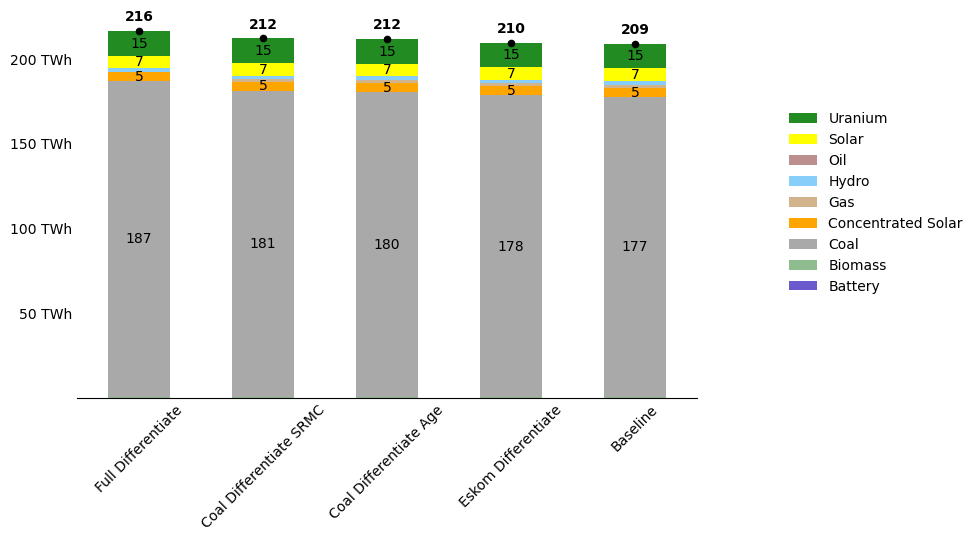

In [30]:
df = epm_results['pEnergyByFuel'].copy()
df['value'] = df['value'] / 1e6

df.loc[(df.scenario == 'baseline') & (df.competition == 'Least-cost'), 'scenario'] = 'Least-cost'

df = df[~((df["scenario"] != "Least-cost") & (df["competition"] == "Least-cost"))]

df = df.drop(columns=['competition'])

# filename = Path(folder) / Path('images') / Path('energy.png')
filename = None
make_stacked_bar_subplots(df, filename, dict_specs['colors'], column_stacked='fuel', column_subplots=None,
                          column_value='value', column_multiple_bars='scenario', figsize=(8,5),
                          format_y=lambda y, _: '{:.0f} TWh'.format(y), annotation_format="{:.0f}", cap=5, rotation=45,
                          show_total=True, order_scenarios=['Full Differentiate', 'Coal Differentiate SRMC', 'Coal Differentiate Age',
                                                            'Eskom Differentiate', 'Baseline'])

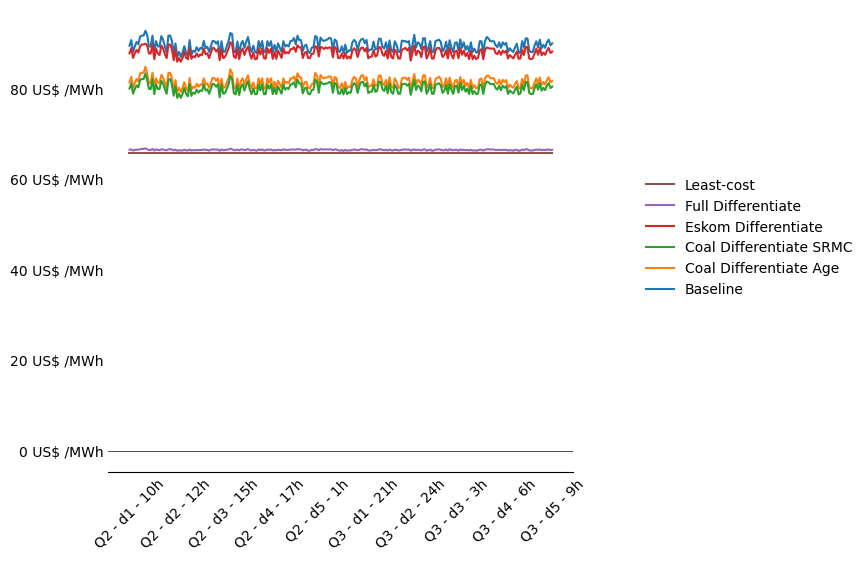

In [31]:

df = epm_results['pPrice'].copy()
df["hour"] = df["t"].str.extract(r"(\d+)").astype(int).astype(str) + "h"

df["day_hour"] = df["day"].astype(str) + " - " + df["hour"]
df["season_day_hour"] = df["season"].astype(str) + " - " + df["day"].astype(str) + " - " + df["hour"]

# Creating a least-cost scenario for reference
# df.loc[(df.scenario == df.scenario.unique()[0]) & (df.competition == 'Least-cost'),'scenario'] = 'Least-cost'
df.loc[(df.scenario == 'Baseline') & (df.competition == 'Least-cost'),'scenario'] = 'Least-cost'

df = df[~((df["scenario"] != "Least-cost") & (df["competition"] == "Least-cost"))]

df = df.drop(columns=['competition'])

df = df[~((df["scenario"] == "Coal Differentiate Availability"))]

# df = df.loc[df.scenario.isin(['Least-cost'])]
df = df.loc[(df.season.isin(['Q2', 'Q3']))]
# df = df.loc[(df.season == 'Q3') & (df.day.isin(['d1', 'd2', 'd3']))]

filename = None

make_multiple_lines_subplots(df, filename, dict_colors=None, figsize=(6,6), column_subplots=None, column_xaxis='season_day_hour',
                          column_value='value', column_multiple_lines='scenario',
                          format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y), annotation_format="{:.0f}",
                             max_ticks=10, rotation=45)


# Explore data

# Plots multi zone

## Prices

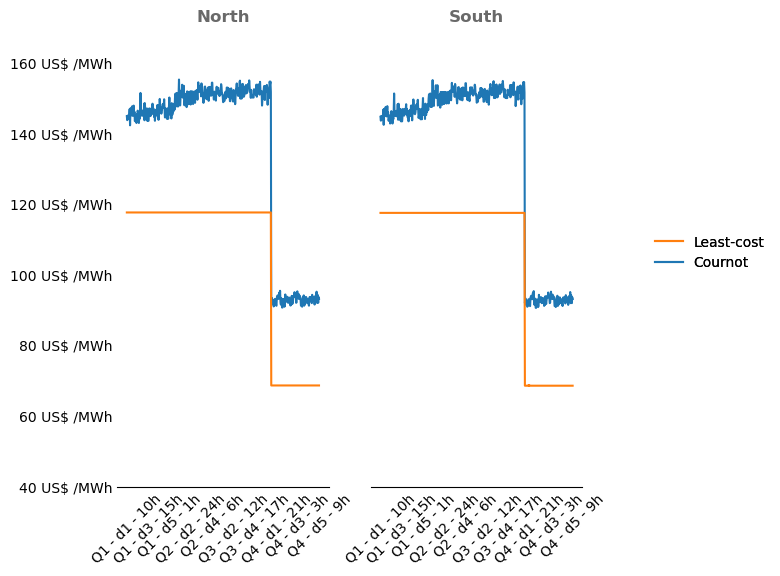

In [14]:
df = epm_results['pPrice'].copy()
df["hour"] = df["t"].str.extract(r"(\d+)").astype(int).astype(str) + "h"

df["day_hour"] = df["day"].astype(str) + " - " + df["hour"]
df["season_day_hour"] = df["season"].astype(str) + " - " + df["day"].astype(str) + " - " + df["hour"]

df = df.loc[df.scenario == 'Baseline']
df = df.drop(columns=['scenario'])
df = df.loc[(df.season.isin(['Q1', 'Q2', 'Q3', 'Q4']))]

filename = None

make_multiple_lines_subplots(df, filename, dict_colors=None, figsize=(6, 6), column_subplots='zone',
                             column_xaxis='season_day_hour', column_value='value',
                             column_multiple_lines='competition', format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y),
                             annotation_format="{:.0f}", max_ticks=10, rotation=45, ylim_bottom=40)

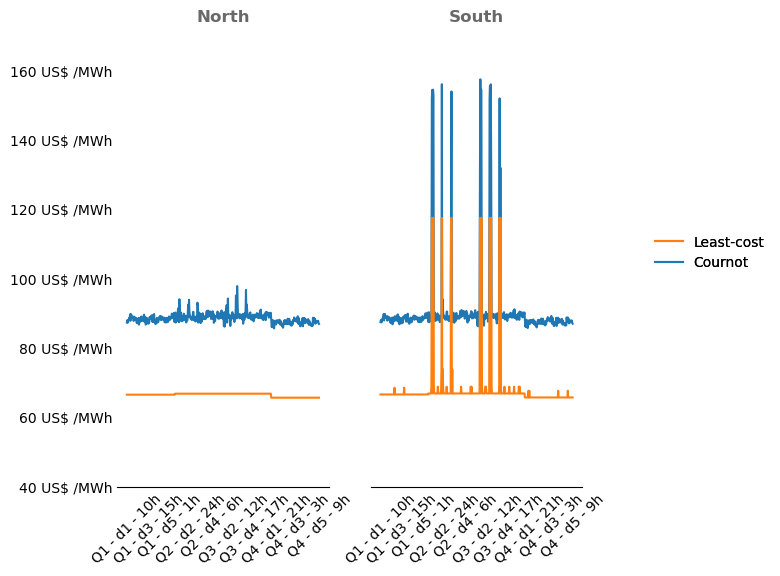

In [40]:
df = epm_results['pPrice'].copy()
df["hour"] = df["t"].str.extract(r"(\d+)").astype(int).astype(str) + "h"

df["day_hour"] = df["day"].astype(str) + " - " + df["hour"]
df["season_day_hour"] = df["season"].astype(str) + " - " + df["day"].astype(str) + " - " + df["hour"]

df = df.loc[df.scenario == 'TwoZone3000']
df = df.drop(columns=['scenario'])
df = df.loc[(df.season.isin(['Q1', 'Q2', 'Q3', 'Q4']))]

filename = None

make_multiple_lines_subplots(df, filename, dict_colors=None, figsize=(6, 6), column_subplots='zone',
                             column_xaxis='season_day_hour', column_value='value',
                             column_multiple_lines='competition', format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y),
                             annotation_format="{:.0f}", max_ticks=10, rotation=45, ylim_bottom=40)

## Demand and production

In [15]:
df_demand =  epm_results['pDemandTotal'].copy()
df_demand = df_demand.groupby(['scenario', 'competition', 'zone', 'year'])['value'].sum().reset_index()
df_demand['value'] = df_demand['value'] * 1e-6
df_demand = df_demand.rename(columns={'value': 'demand'})


df_prod =  epm_results['pEnergyByFuel'].copy()
df_prod = df_prod.groupby(['scenario', 'competition', 'zone', 'year'])['value'].sum().reset_index()
df_prod['value'] = df_prod['value'] * 1e-6
df_prod = df_prod.rename(columns={'value': 'production'})

df_tot = df_demand.merge(df_prod, on=['scenario', 'competition', 'zone', 'year'])
df_tot = df_tot.set_index(['scenario', 'competition', 'zone', 'year']).stack().to_frame().rename(columns={0: 'value'}).reset_index().rename(columns={'level_4': 'attribute'})
 
df_tot = df_tot.loc[(df_tot.scenario == 'Baseline') & (df_tot.competition == 'Least-cost')]


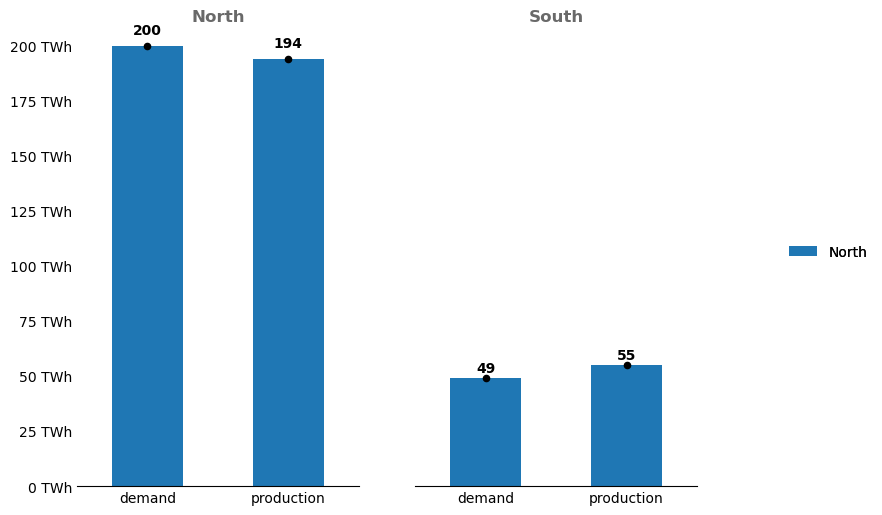

In [16]:
filename = None
make_stacked_bar_subplots(df_tot, filename, dict_colors=None ,column_stacked=None, column_subplots='zone',
                          column_value='value', column_multiple_bars='attribute', annotate=False,
                          format_y=lambda y, _: '{:.0f} TWh'.format(y), annotation_format="{:.0f}", cap=5, show_total=True,
                          figsize=(8,6))

In [28]:
df_demand =  epm_results['pDemandTotal'].copy()
df_demand = df_demand.groupby(['scenario', 'competition', 'zone', 'year'])['value'].sum().reset_index()
df_demand['value'] = df_demand['value'] * 1e-6
df_demand = df_demand.rename(columns={'value': 'demand'})


df_prod =  epm_results['pEnergyByFuel'].copy()
df_prod = df_prod.groupby(['scenario', 'competition', 'zone', 'year'])['value'].sum().reset_index()
df_prod['value'] = df_prod['value'] * 1e-6
df_prod = df_prod.rename(columns={'value': 'production'})

df_tot = df_demand.merge(df_prod, on=['scenario', 'competition', 'zone', 'year'])
df_tot = df_tot.set_index(['scenario', 'competition', 'zone', 'year']).stack().to_frame().rename(columns={0: 'value'}).reset_index().rename(columns={'level_4': 'attribute'})
 
df_tot = df_tot.loc[(df_tot.scenario == 'TwoZone') & (df_tot.competition == 'Least-cost')]


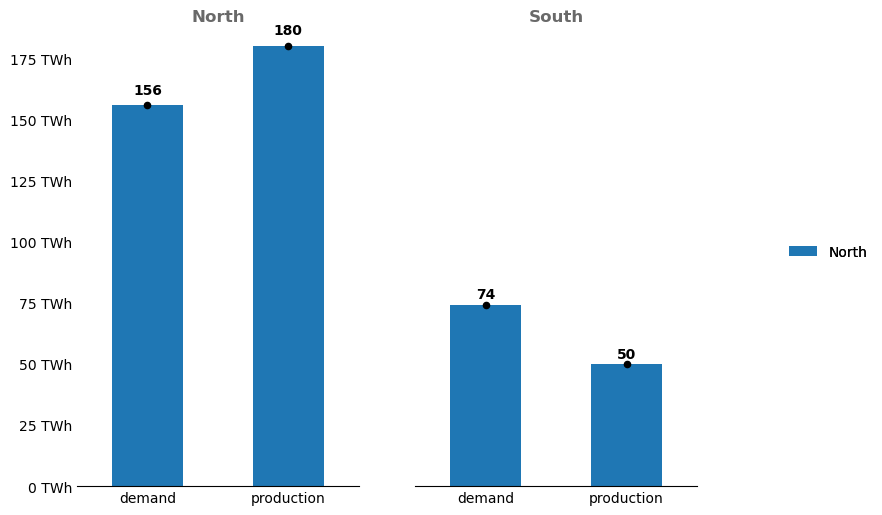

In [29]:
filename = None
make_stacked_bar_subplots(df_tot, filename, dict_colors=None ,column_stacked=None, column_subplots='zone',
                          column_value='value', column_multiple_bars='attribute', annotate=False,
                          format_y=lambda y, _: '{:.0f} TWh'.format(y), annotation_format="{:.0f}", cap=5, show_total=True,
                          figsize=(8,6))

# Plots single zone

## Situation South Africa

### Power mix

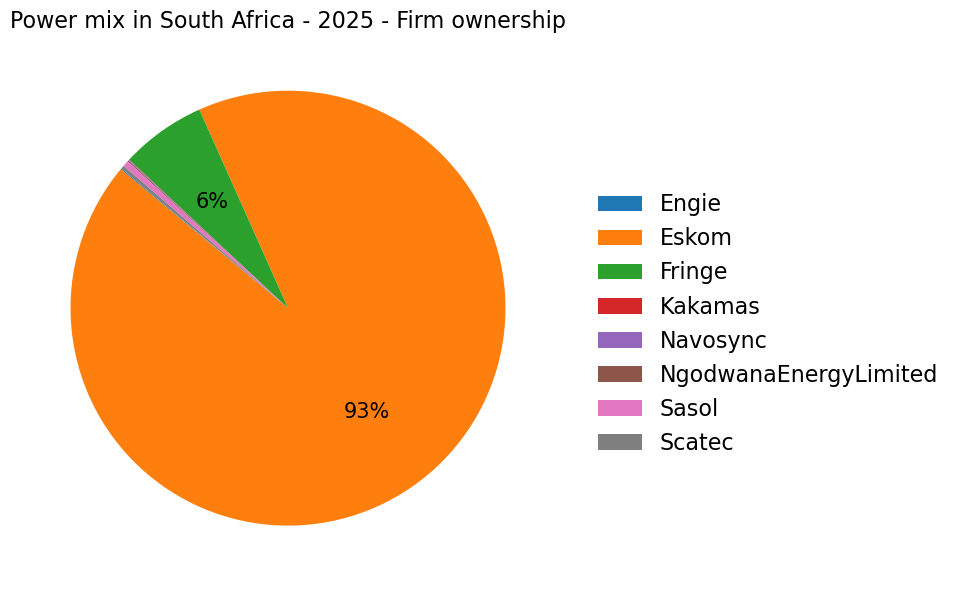

In [9]:
df = epm_results['pEnergyByFirm']
df = df.loc[(df.scenario == 'Baseline') & (df.competition == 'Least-cost')]

subplot_pie_new(df, index='firm', dict_colors=None, subplot_column=None, share_column='value', title='Power mix in South Africa - 2025 - Firm ownership', figsize=(8, 4),
                    percent_cap=1, filename=None, rename=None, bbox_to_anchor=(1.1, 0.2), loc='lower center', font_title=16, annotation_font=15)

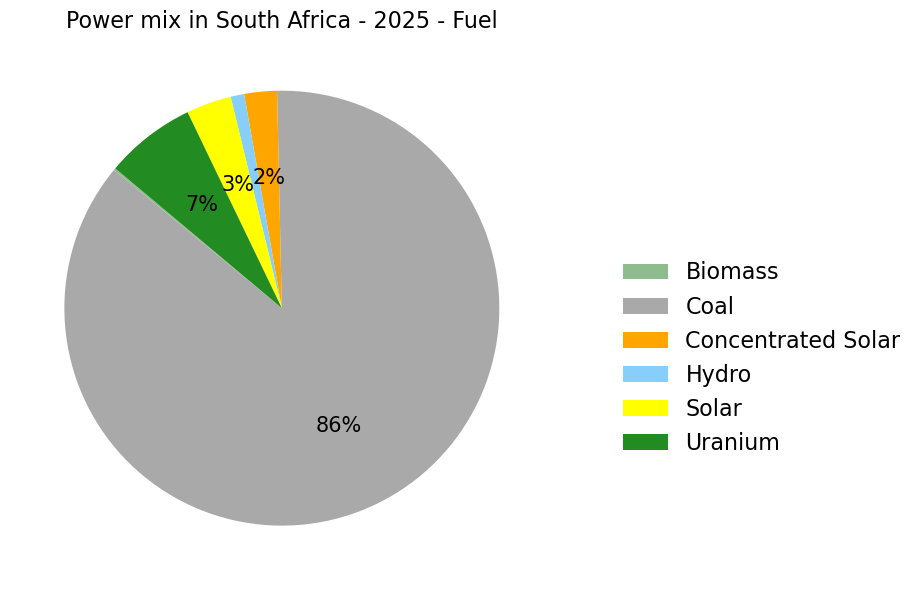

In [11]:
df = epm_results['pEnergyByFuel']
df = df.loc[(df.scenario == 'Baseline') & (df.competition == 'Least-cost')]

subplot_pie_new(df, index='fuel', dict_colors=dict_specs['colors'], subplot_column=None, share_column='value', title='Power mix in South Africa - 2025 - Fuel', figsize=(8, 4),
                    percent_cap=2, filename=None, rename=None, bbox_to_anchor=(1.1, 0.2), loc='lower center', font_title=16, annotation_font=15)

### Dispatch

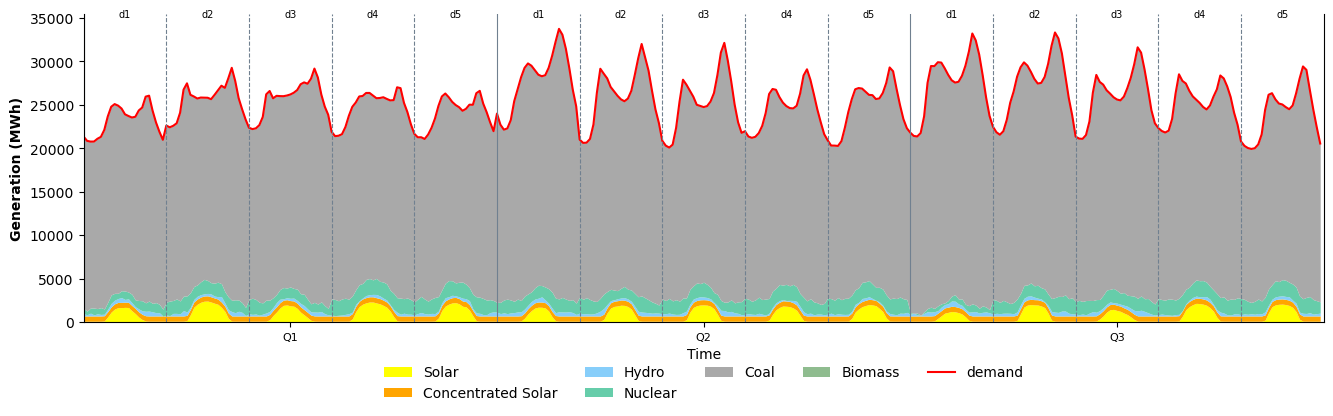

In [11]:
dispatch_df = epm_results['pEnergyByFuelDispatch'].copy()
dispatch_df['fuel'] = dispatch_df['fuel'].replace({'Uranium': 'Nuclear'})

dfs_to_plot_area = {
    'pEnergyByFuelDispatch': dispatch_df,
    'pDispatch': filter_dataframe(epm_results['pDispatch'], {'attribute': ['Unmet demand']})
}

dfs_to_plot_line = {
    'pDemand': epm_results['pDemand']
}

selected_scenario = 'baseline'
competition = 'Least-cost'

filename = None # Only for display in the notebook

select_time = {
    'season': ['Q1', 'Q2', 'Q3'],
    'day': ['d1', 'd2', 'd3', 'd4', 'd5']
}

make_complete_fuel_dispatch_plot(dfs_to_plot_area, dfs_to_plot_line, dict_colors=dict_specs['colors'],
                                 year=2025, scenario=selected_scenario, competition=competition, zone=REGION_NAME,
                                 fuel_grouping=None, select_time=select_time, filename=filename, reorder_dispatch=['Solar', 'Concentrated Solar', 'Hydro', 'Nuclear', 'Coal', 'Gas', 'Oil'],
                                 figsize=(16,4))   

### Coal power plants

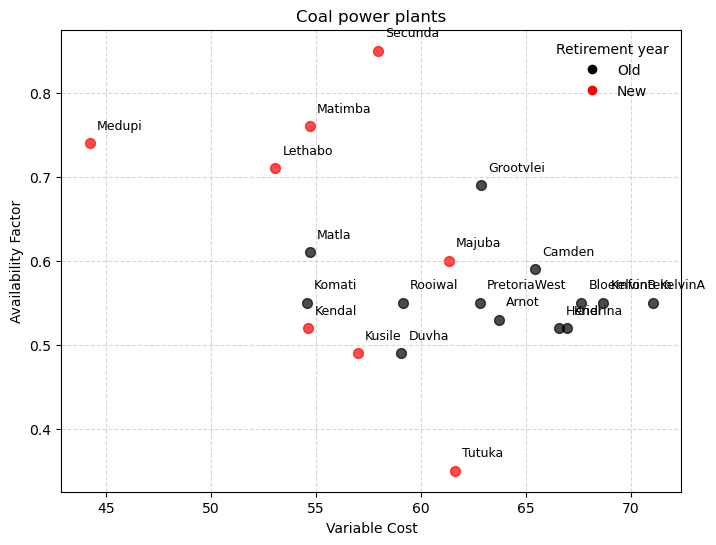

In [13]:
import re 

scenarios = pd.read_csv(Path(results_folder) / Path('simulation_scenarios.csv'), index_col=0)
pAvailability = scenarios.loc['pAvailability', 'baseline']
pAvailability = pd.read_csv(pAvailability, index_col=[0])
pAvailability.index.names = ['generator']
# pAvailability = pAvailability.reset_index()
pAvailability['Availability Factor'] = pAvailability.mean(axis=1)
pAvailability = pAvailability[['Availability Factor']]
pAvailability = pAvailability.reset_index()

pGenData = scenarios.loc['pGenData', 'baseline']
pGenData = pd.read_csv(pGenData, index_col=[0])
pGenData = pGenData.rename_axis( 'generator', axis=0)
pGenData = pGenData.loc[pGenData.Fuel == 'Coal']
pGenData = pGenData[['ReYr']]
pGenData = pGenData.reset_index()

pVarCost = epm_results['pVarCost'].copy()
pVarCost = pVarCost.loc[pVarCost.scenario == 'baseline',['generator', 'value']].rename(columns={'value':'Variable Cost'})

df = pGenData.merge(pVarCost, on='generator', how='left')
df = df.merge(pAvailability, on='generator', how='left')

df['status'] = df.apply(lambda row: 1 if row['ReYr'] < 2035 else 0, axis=1)

# Extract the base name (e.g., "Arnot" from "Arnot1_TH")
df['generator_group'] = df['generator'].apply(lambda x: re.match(r"([A-Za-z]+)", x).group(1) if re.match(r"([A-Za-z]+)", x) else x)
df_grouped = df.groupby('generator_group').mean(numeric_only=True).reset_index()
df_grouped = df_grouped.rename(columns={'generator_group':'generator'})
df_grouped['status'] = df_grouped['status'].map({1: 'Old', 0: 'New'})
df_grouped

x_column = 'Variable Cost'
y_column = 'Availability Factor'
color_col = 'status'
column_annotate = 'Variable Cost'

filename = None # Only for display in the notebook

colors = dict_specs['colors']
colors.update({
    'Old': 'black',
    'New': 'red'
})
subplot_scatter(df_grouped, x_column, y_column, color_col, colors,
                            ymax=None, title='Coal power plants', legend='Retirement year',
                            filename=filename, xmax=None,  size_scale=None, annotate_thresh=0, column_annotate=column_annotate,
                            figsize=(6,6)
                             )

## Multi zone

In [4]:
epm_results['pPrice']

,scenario,competition,zone,year,season,day,t,value
0,TwoZone2030Infinite,Least-cost,South,2030,Q1,d1,t1,115.850020
1,TwoZone2030Infinite,Least-cost,South,2030,Q1,d1,t2,115.850020
2,TwoZone2030Infinite,Least-cost,South,2030,Q1,d1,t3,115.850020
3,TwoZone2030Infinite,Least-cost,South,2030,Q1,d1,t4,115.850020
4,TwoZone2030Infinite,Least-cost,South,2030,Q1,d1,t5,115.850020
...,...,...,...,...,...,...,...,...
955,TwoZone2027Infinite,Cournot,North,2027,Q4,d5,t20,83.949144
956,TwoZone2027Infinite,Cournot,North,2027,Q4,d5,t21,80.886702
957,TwoZone2027Infinite,Cournot,North,2027,Q4,d5,t22,81.280060
958,TwoZone2027Infinite,Cournot,North,2027,Q4,d5,t23,80.321998


In [6]:
epm_results['pPriceWeighted'].scenario.unique()

array(['TwoZone', 'TwoZone2027', 'TwoZone2027Infinite', 'TwoZone2030',
       'TwoZone2030Infinite'], dtype=object)

In [17]:
epm_results['pPrice'].loc[(epm_results['pPrice']).scenario == 'TransmissionMultiZone'].zone.unique()

array(['WesternCape', 'Mpumalanga', 'KwaZuluNatal', 'FreeState',
       'EasternCape', 'NorthernCape', 'Limpopo', 'NorthWest', 'Gauteng'],
      dtype=object)

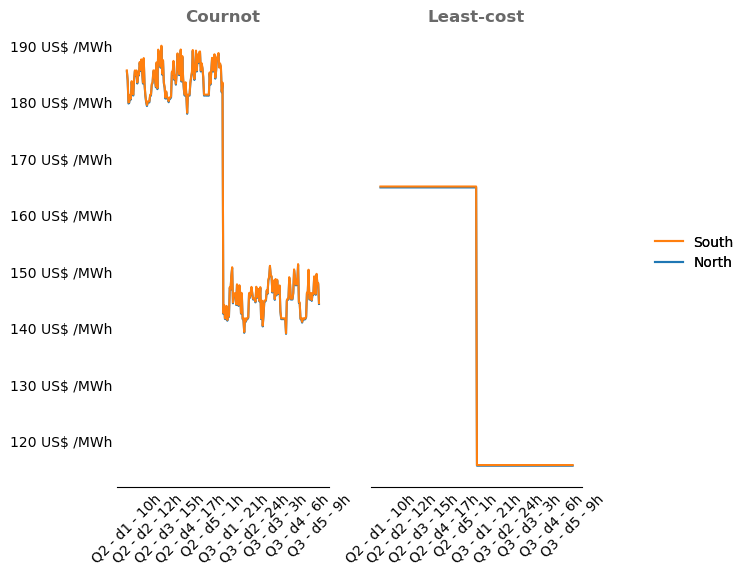

In [10]:

df = epm_results['pPrice'].copy()
df = df.loc[df.scenario == 'TwoZone2030']
df["hour"] = df["t"].str.extract(r"(\d+)").astype(int).astype(str) + "h"

df["day_hour"] = df["day"].astype(str) + " - " + df["hour"]
df["season_day_hour"] = df["season"].astype(str) + " - " + df["day"].astype(str) + " - " + df["hour"]

# df = df.loc[df.competition == 'Cournot']

# df = df.drop(columns=['scenario'])

# df = df.loc[df.scenario.isin(['Least-cost'])]
df = df.loc[(df.season.isin(['Q2', 'Q3']))]
# df = df.loc[(df.season == 'Q3') & (df.day.isin(['d1', 'd2', 'd3']))]

filename = None

make_multiple_lines_subplots(df, filename, dict_colors=None, figsize=(6,6), column_subplots='competition',
                             column_xaxis='season_day_hour', column_value='value', 
                             column_multiple_lines='zone', format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y), annotation_format="{:.0f}", max_ticks=10, rotation=45, ylim_bottom=None)


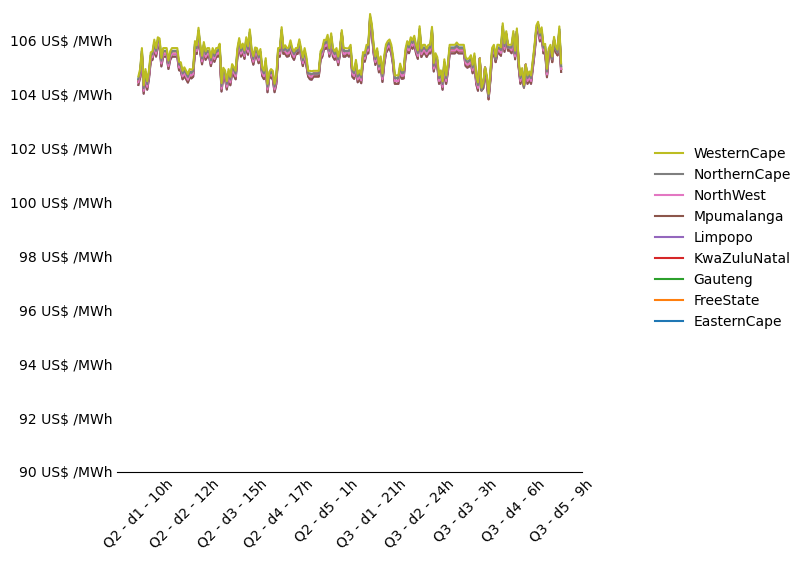

In [7]:

df = epm_results['pPrice'].copy()
df = df.loc[df.scenario == 'TransmissionInfinite']
df["hour"] = df["t"].str.extract(r"(\d+)").astype(int).astype(str) + "h"

df["day_hour"] = df["day"].astype(str) + " - " + df["hour"]
df["season_day_hour"] = df["season"].astype(str) + " - " + df["day"].astype(str) + " - " + df["hour"]

df = df.loc[df.competition == 'Cournot']

df = df.drop(columns=['scenario'])

# df = df.loc[df.scenario.isin(['Least-cost'])]
df = df.loc[(df.season.isin(['Q2', 'Q3']))]
# df = df.loc[(df.season == 'Q3') & (df.day.isin(['d1', 'd2', 'd3']))]

filename = None

make_multiple_lines_subplots(df, filename, dict_colors=None, figsize=(6,6), column_subplots='competition',
                             column_xaxis='season_day_hour', column_value='value', 
                             column_multiple_lines='zone', format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y), annotation_format="{:.0f}", max_ticks=10, rotation=45, ylim_bottom=90)


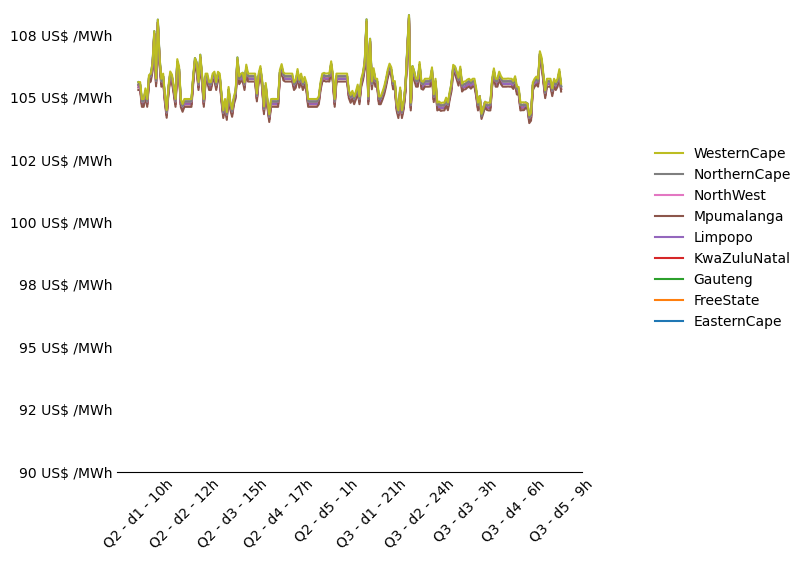

In [8]:
# Scenario Transmission Constraint
df = epm_results['pPrice'].copy()
df = df.loc[df.scenario == 'TransmissionMultiZone']
df["hour"] = df["t"].str.extract(r"(\d+)").astype(int).astype(str) + "h"

df["day_hour"] = df["day"].astype(str) + " - " + df["hour"]
df["season_day_hour"] = df["season"].astype(str) + " - " + df["day"].astype(str) + " - " + df["hour"]

df = df.loc[df.competition == 'Cournot']

df = df.drop(columns=['scenario'])

# df = df.loc[df.scenario.isin(['Least-cost'])]
df = df.loc[(df.season.isin(['Q2', 'Q3']))]
# df = df.loc[(df.season == 'Q3') & (df.day.isin(['d1', 'd2', 'd3']))]

filename = None

make_multiple_lines_subplots(df, filename, dict_colors=None, figsize=(6,6), column_subplots='competition',
                             column_xaxis='season_day_hour', column_value='value', 
                             column_multiple_lines='zone', format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y), annotation_format="{:.0f}", max_ticks=10, rotation=45, ylim_bottom=90)


## Prices

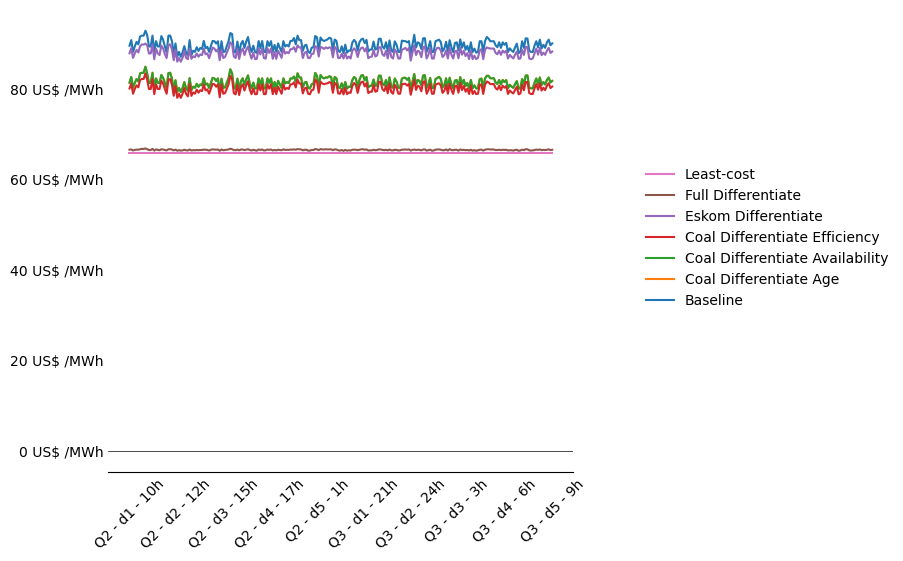

In [13]:

df = epm_results['pPrice'].copy()
df["hour"] = df["t"].str.extract(r"(\d+)").astype(int).astype(str) + "h"

df["day_hour"] = df["day"].astype(str) + " - " + df["hour"]
df["season_day_hour"] = df["season"].astype(str) + " - " + df["day"].astype(str) + " - " + df["hour"]

# Creating a least-cost scenario for reference
# df.loc[(df.scenario == df.scenario.unique()[0]) & (df.competition == 'Least-cost'),'scenario'] = 'Least-cost'
df.loc[(df.scenario == 'Baseline') & (df.competition == 'Least-cost'),'scenario'] = 'Least-cost'

df = df[~((df["scenario"] != "Least-cost") & (df["competition"] == "Least-cost"))]

df = df.drop(columns=['competition'])

# df = df.loc[df.scenario.isin(['Least-cost'])]
df = df.loc[(df.season.isin(['Q2', 'Q3']))]
# df = df.loc[(df.season == 'Q3') & (df.day.isin(['d1', 'd2', 'd3']))]

filename = None

make_multiple_lines_subplots(df, filename, dict_colors=None, figsize=(6,6), column_subplots=None, column_xaxis='season_day_hour',
                          column_value='value', column_multiple_lines='scenario',
                          format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y), annotation_format="{:.0f}",
                             max_ticks=10, rotation=45)


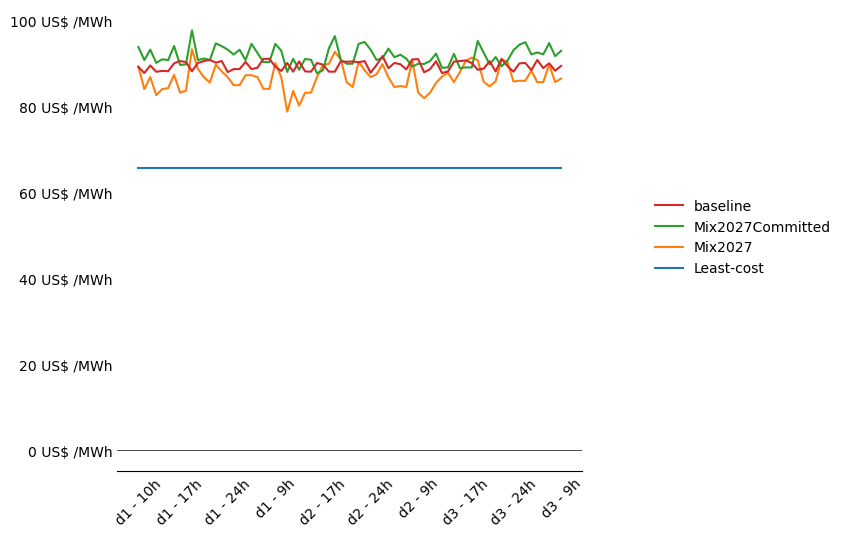

In [48]:

df = epm_results['pPrice'].copy()
df["hour"] = df["t"].str.extract(r"(\d+)").astype(int).astype(str) + "h"

df["day_hour"] = df["day"].astype(str) + " - " + df["hour"]
df["season_day_hour"] = df["season"].astype(str) + " - " + df["day"].astype(str) + " - " + df["hour"]

# Creating a least-cost scenario for reference
# df.loc[(df.scenario == df.scenario.unique()[0]) & (df.competition == 'Least-cost'),'scenario'] = 'Least-cost'
df.loc[(df.scenario == 'baseline') & (df.competition == 'Least-cost'),'scenario'] = 'Least-cost'

df = df[~((df["scenario"] != "Least-cost") & (df["competition"] == "Least-cost"))]

df = df.drop(columns=['competition'])

df = df.loc[~df.scenario.isin(['Mix2030'])]
# df = df.loc[(df.season == 'Q2')]
df = df.loc[(df.season == 'Q3') & (df.day.isin(['d1', 'd2', 'd3']))]

filename = None

make_multiple_lines_subplots(df, filename, dict_colors=None, figsize=(6,6), column_subplots=None, column_xaxis='day_hour',
                          column_value='value', column_multiple_lines='scenario',
                          format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y), annotation_format="{:.0f}",
                             max_ticks=10, rotation=45)


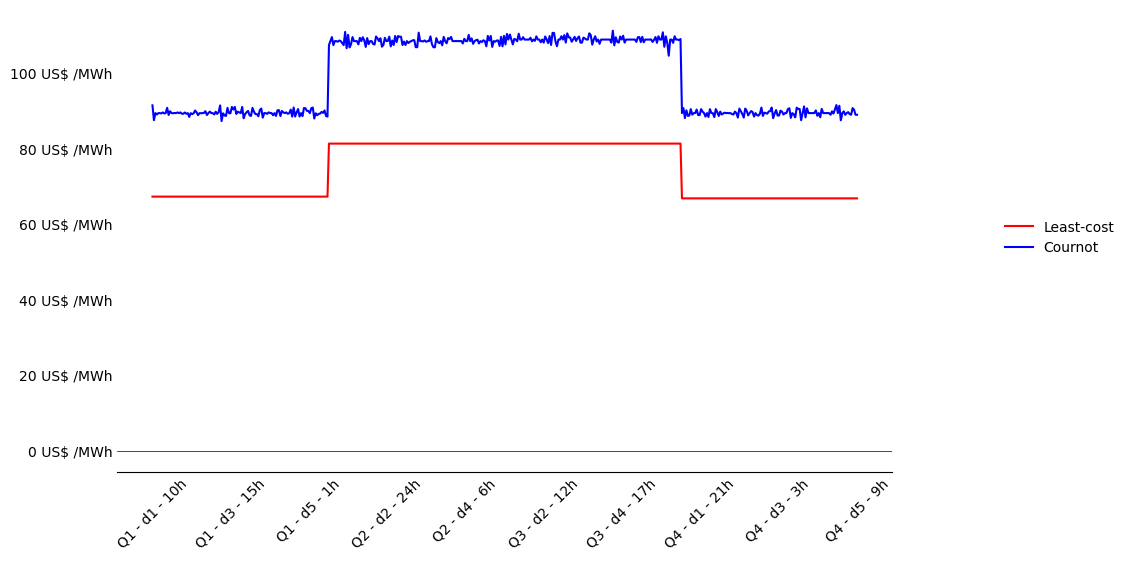

In [35]:
df = epm_results['pPrice'].copy()
df["hour"] = df["t"].str.extract(r"(\d+)").astype(int).astype(str) + "h"

df["season_day_hour"] = df["season"].astype(str) + " - " + df["day"].astype(str) + " - " + df["hour"]
# df['value'] = df['value'] / 1e3
# df = df.loc[(df.season == 'Q1') & (df.day == 'd1')]
# df = df.loc[(df.season == 'Q1')]

filename = None

make_multiple_lines_subplots(df, filename, dict_specs['colors'], column_subplots='scenario', column_xaxis='season_day_hour',
                          column_value='value', column_multiple_lines='competition',
                          format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y), annotation_format="{:.0f}",
                             max_ticks=10, rotation=45)

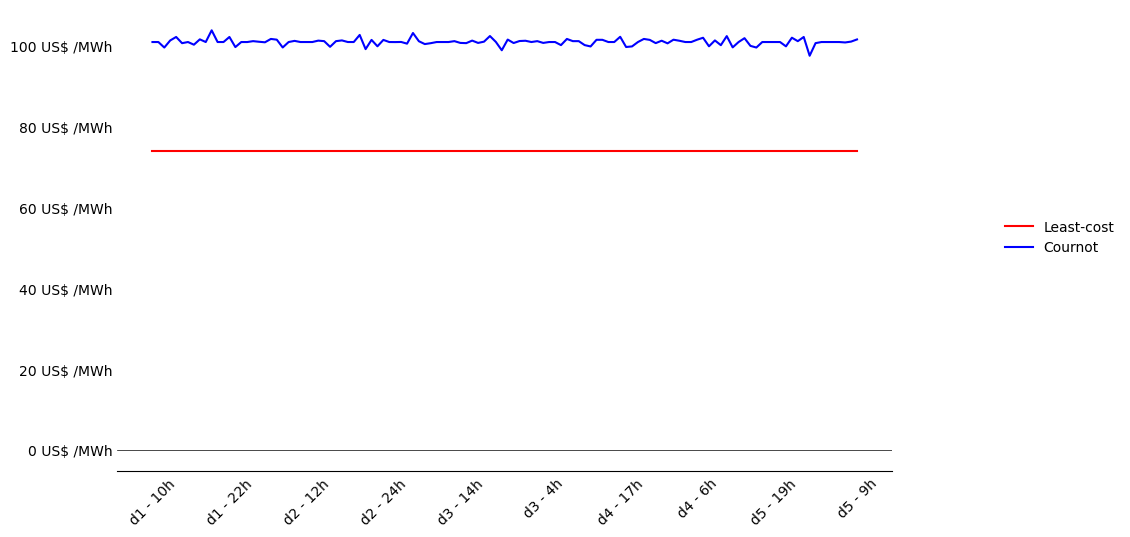

In [31]:
df = epm_results['pPrice'].copy()
df["hour"] = df["t"].str.extract(r"(\d+)").astype(int).astype(str) + "h"

df["day_hour"] = df["day"].astype(str) + " - " + df["hour"]
# df['value'] = df['value'] / 1e3
# df = df.loc[(df.season == 'Q1') & (df.day == 'd1')]
df = df.loc[(df.season == 'Q1')]

filename = None

make_multiple_lines_subplots(df, filename, dict_specs['colors'], column_subplots='scenario', column_xaxis='day_hour',
                          column_value='value', column_multiple_lines='competition',
                          format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y), annotation_format="{:.0f}",
                             max_ticks=10, rotation=45)

### Price duration curve

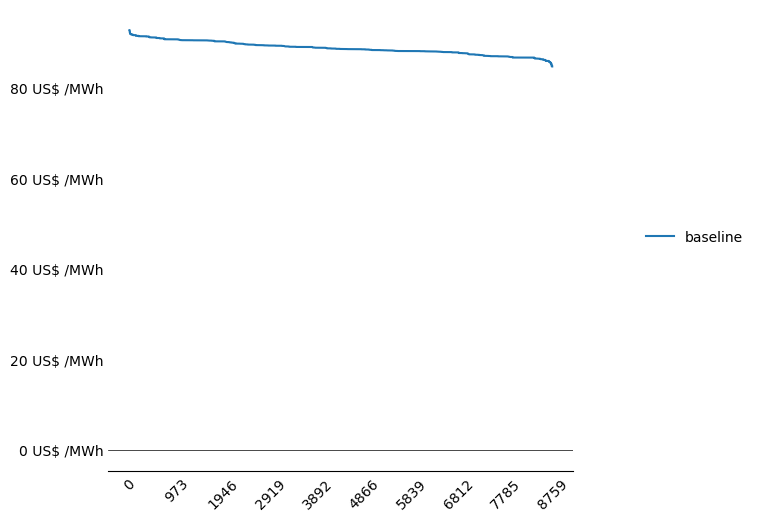

In [6]:
df = epm_results['pPrice'].copy()
df.loc[(df.scenario == 'baseline') & (df.competition == 'Least-cost'),'scenario'] = 'Least-cost'
df = df[~((df["scenario"] != "Least-cost") & (df["competition"] == "Least-cost"))]

df = df[((df["scenario"] == "baseline"))]

scenarios = pd.read_csv(Path(results_folder) / Path('simulation_scenarios.csv'), index_col=0)
pDurationpath = scenarios.loc['pDuration', 'baseline']
pDuration = pd.read_csv(pDurationpath, index_col=[0,1])

expanded_price = get_duration_curve(df, pDuration)

filename = None

make_multiple_lines_subplots(expanded_price, filename, None, column_subplots=None, column_xaxis='hour',
                          column_value='value', column_multiple_lines='scenario',
                          format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y), annotation_format="{:.0f}",
                             max_ticks=10, rotation=45, figsize=(6,6))

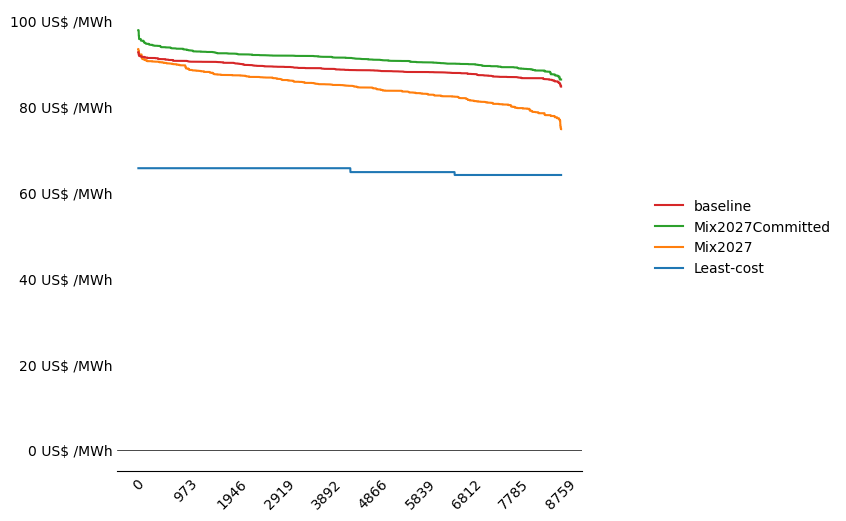

In [39]:
df = epm_results['pPrice'].copy()
df.loc[(df.scenario == 'baseline') & (df.competition == 'Least-cost'),'scenario'] = 'Least-cost'
df = df[~((df["scenario"] != "Least-cost") & (df["competition"] == "Least-cost"))]

df = df[~((df["scenario"] == "Mix2030"))]

scenarios = pd.read_csv(Path(results_folder) / Path('simulation_scenarios.csv'), index_col=0)
pDurationpath = scenarios.loc['pDuration', 'baseline']
pDuration = pd.read_csv(pDurationpath, index_col=[0,1])

expanded_price = get_duration_curve(df, pDuration)

filename = None

make_multiple_lines_subplots(expanded_price, filename, None, column_subplots=None, column_xaxis='hour',
                          column_value='value', column_multiple_lines='scenario',
                          format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y), annotation_format="{:.0f}",
                             max_ticks=10, rotation=45, figsize=(6,6))

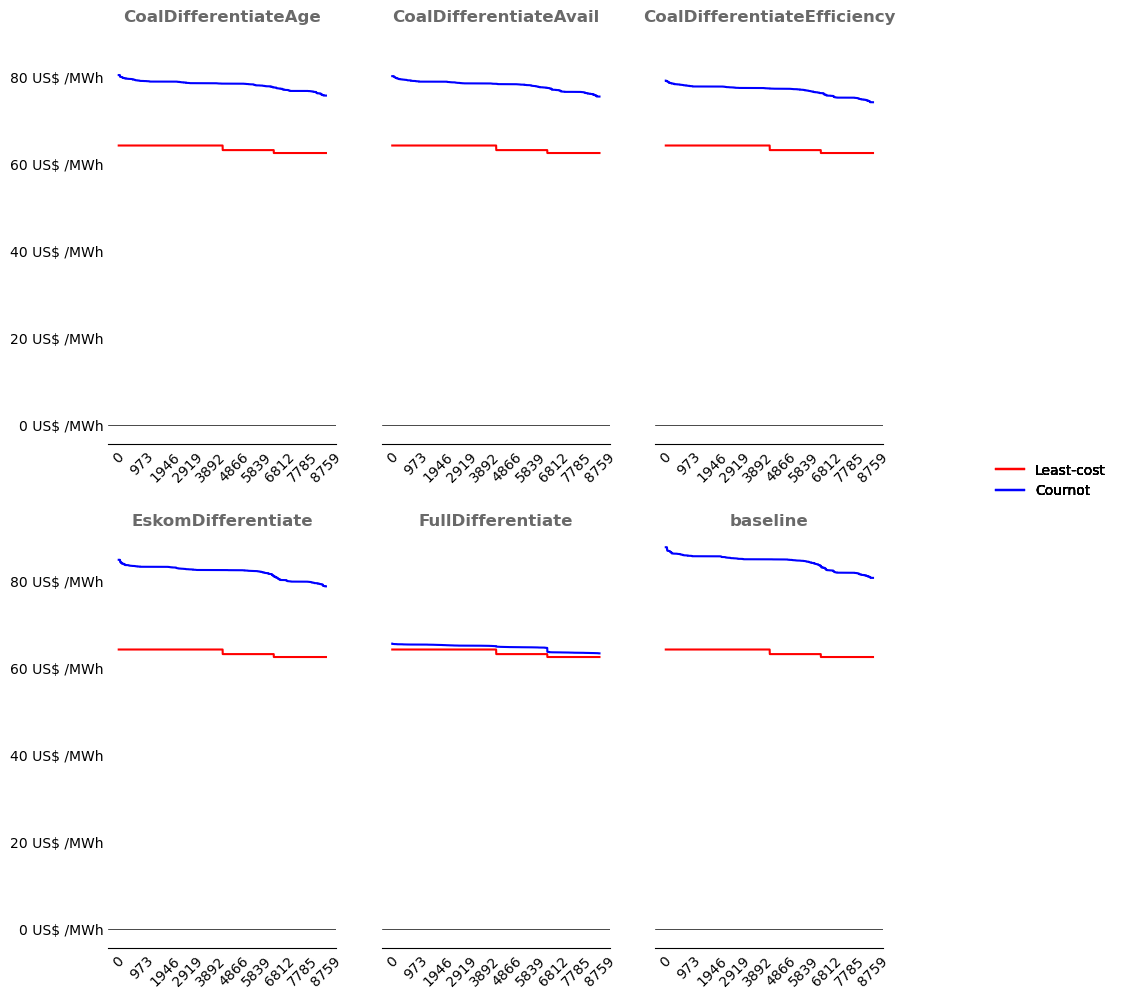

In [10]:
price = epm_results['pPrice']
scenarios = pd.read_csv(Path(results_folder) / Path('simulation_scenarios.csv'), index_col=0)
pDurationpath = scenarios.loc['pDuration', 'baseline']
pDuration = pd.read_csv(pDurationpath, index_col=[0,1])

expanded_price = get_duration_curve(price, pDuration)


filename = None

make_multiple_lines_subplots(expanded_price, filename, dict_specs['colors'], column_subplots='scenario', column_xaxis='hour',
                          column_value='value', column_multiple_lines='competition',
                          format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y), annotation_format="{:.0f}",
                             max_ticks=10, rotation=45)


/var/folders/q1/q3sbpxn50b5frhgsdn1cq0z80000gn/T/ipykernel_23173/2626548930.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  expanded_price = price.groupby(['scenario', 'competition'], group_keys=False).apply(expand_group)


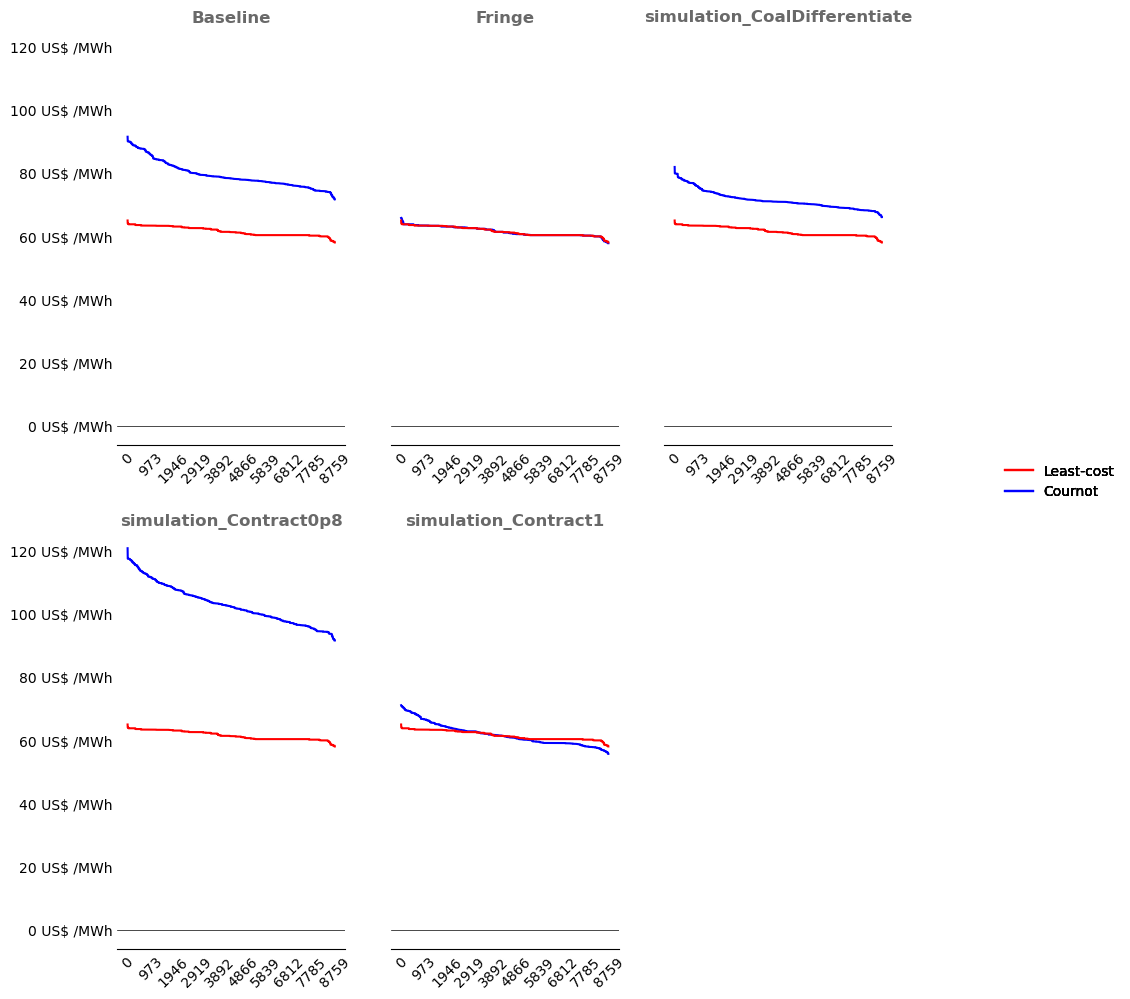

In [5]:
price = epm_results['pPrice']
duration = pd.read_csv(Path('../input/pDuration.csv'), index_col=[0,1])

# Reshape duration to merge properly
duration = duration.stack().to_frame().reset_index().rename(columns={0: 'weight', 'level_0': 'season', 'level_1': 'day', 'level_2': 't'})

# Merge price and duration
price = price.merge(duration, on=['season', 'day', 't'], how='left')

# Function to expand and add an hour index
def expand_group(df):
    expanded_df = df.loc[df.index.repeat(df['weight'])].reset_index(drop=True)
    expanded_df = expanded_df.sort_values(by='value', ascending=False)
    expanded_df['hour'] = range(len(expanded_df))  # Assign duration from 0 to n for each group
    return expanded_df

# Apply function per group
expanded_price = price.groupby(['scenario', 'competition'], group_keys=False).apply(expand_group)

filename = None

make_multiple_lines_subplots(expanded_price, filename, dict_specs['colors'], column_subplots='scenario', column_xaxis='hour',
                          column_value='value', column_multiple_lines='competition',
                          format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y), annotation_format="{:.0f}",
                             max_ticks=10, rotation=45)


In [26]:
price = epm_results['pPrice']
duration = pd.read_csv(Path('../input/pDuration.csv'), index_col=[0,1])
duration = duration.stack().to_frame().reset_index().rename(columns={0: 'weight', 'level_0': 'season', 'level_1': 'day', 'level_2': 't'})
price = price.merge(duration, on=['season', 'day', 't'], how='left')
expanded_price = price.loc[price.index.repeat(price['weight'])].reset_index(drop=True)
expanded_price = expanded_price.sort_values(by='value', ascending=False).reset_index(drop=True)

filename = None

make_multiple_lines_subplots(expanded_price, filename, dict_specs['colors'], column_subplots='scenario', column_xaxis='day_hour',
                          column_value='value', column_multiple_lines='competition',
                          format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y), annotation_format="{:.0f}",
                             max_ticks=10, rotation=45)

,scenario,competition,zone,year,season,day,t,value,weight
0,simulation_Contract0p8,Cournot,South_Africa,2025,Q2,d1,t17,120.725832,1
1,simulation_Contract0p8,Cournot,South_Africa,2025,Q3,d1,t17,119.690876,1
2,simulation_Contract0p8,Cournot,South_Africa,2025,Q4,d1,t18,119.351070,1
3,simulation_Contract0p8,Cournot,South_Africa,2025,Q3,d1,t10,118.314222,1
4,simulation_Contract0p8,Cournot,South_Africa,2025,Q2,d1,t11,117.532189,1
...,...,...,...,...,...,...,...,...,...
87595,simulation_Contract1,Cournot,South_Africa,2025,Q4,d4,t6,54.330257,48
87596,simulation_Contract1,Cournot,South_Africa,2025,Q4,d4,t6,54.330257,48
87597,simulation_Contract1,Cournot,South_Africa,2025,Q4,d4,t6,54.330257,48
87598,simulation_Contract1,Cournot,South_Africa,2025,Q4,d4,t6,54.330257,48


In [20]:
tmp.index.repeat(tmp['weight'])

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       3839, 3839, 3839, 3839, 3839, 3839, 3839, 3839, 3839, 3839],
      dtype='int64', length=87600)

In [ ]:
df = epm_results['pPrice'].copy()
df["hour"] = df["t"].str.extract(r"(\d+)").astype(int).astype(str) + "h"

df["day_hour"] = df["day"].astype(str) + " - " + df["hour"]
# df['value'] = df['value'] / 1e3
# df = df.loc[(df.season == 'Q1') & (df.day == 'd1')]
df = df.loc[(df.season == 'Q1')]

filename = None

make_multiple_lines_subplots(df, filename, dict_specs['colors'], column_subplots='scenario', column_xaxis='day_hour',
                          column_value='value', column_multiple_lines='competition',
                          format_y=lambda y, _: '{:.0f} US$ /MWh'.format(y), annotation_format="{:.0f}",
                             max_ticks=10, rotation=45)

## Generation

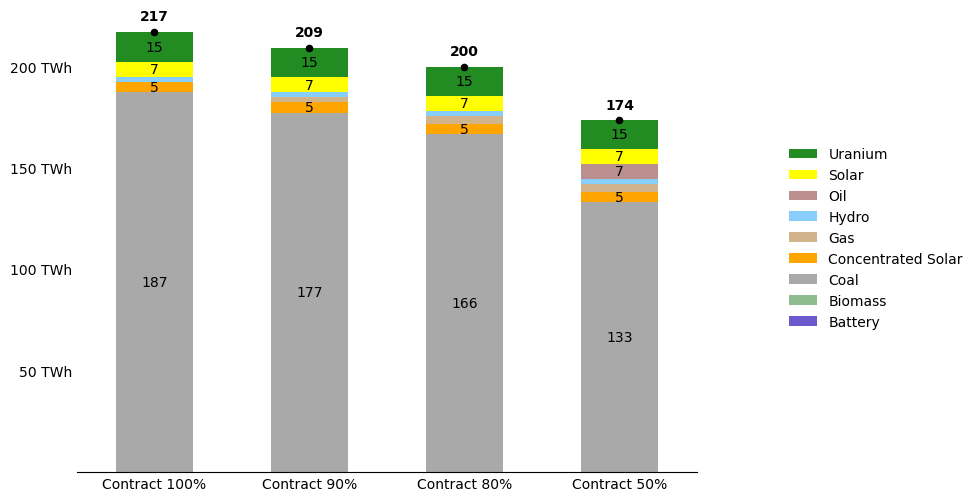

In [4]:


df = epm_results['pEnergyByFuel'].copy()
df['value'] = df['value'] / 1e6

df.loc[(df.scenario == 'baseline') & (df.competition == 'Least-cost'),'scenario'] = 'Least-cost'

df = df[~((df["scenario"] != "Least-cost") & (df["competition"] == "Least-cost"))]

df = df.drop(columns=['competition'])

filename = None
make_stacked_bar_subplots(df, filename, dict_specs['colors'], column_stacked='fuel', column_subplots=None,
                          column_value='value', column_multiple_bars='scenario',
                          format_y=lambda y, _: '{:.0f} TWh'.format(y), annotation_format="{:.0f}", cap=5, show_total=True,
                          order_scenarios=['Contract 100%', 'Contract 90%', 'Contract 80%', 'Contract 50%'], figsize=(8,6))

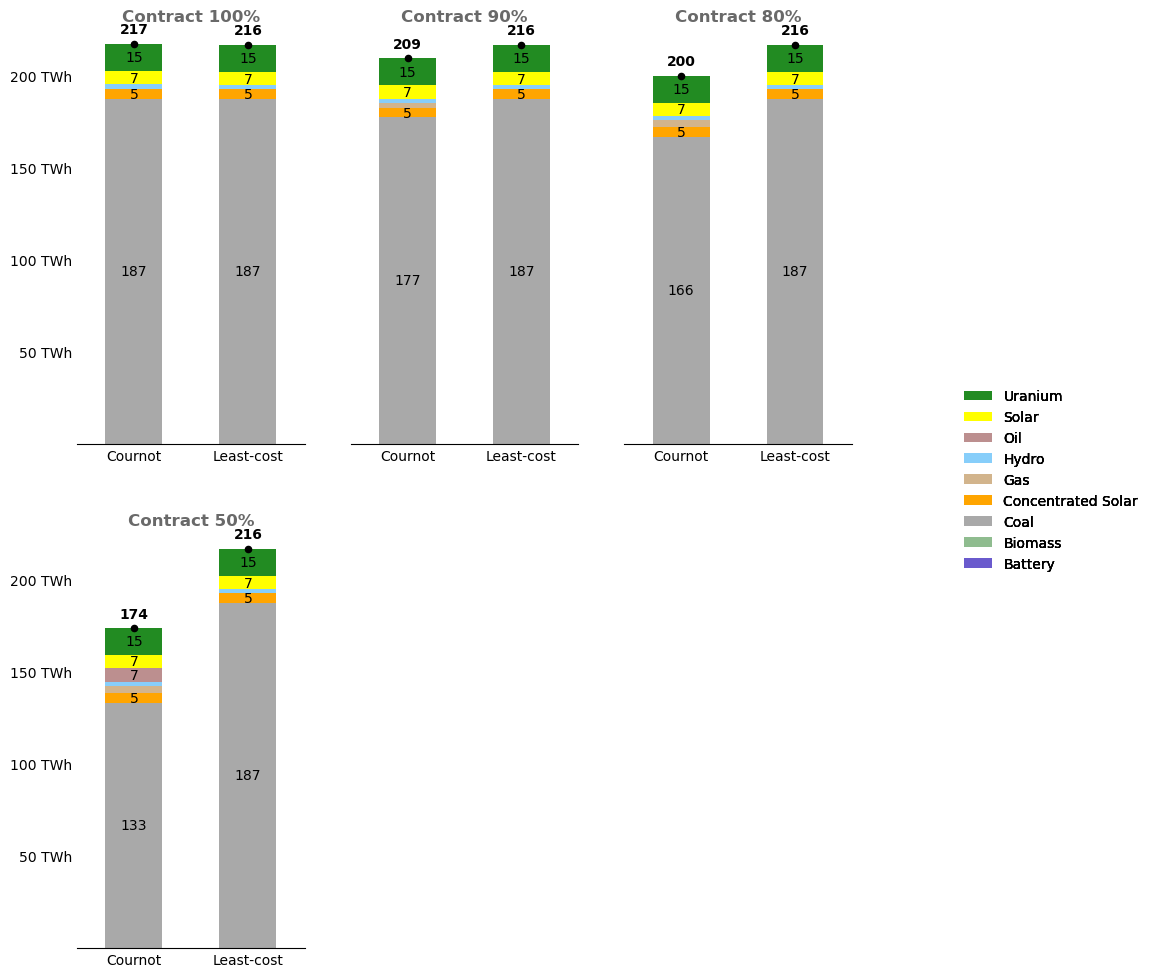

In [5]:
df = epm_results['pEnergyByFuel'].copy()
df['value'] = df['value'] / 1e6
filename = None
make_stacked_bar_subplots(df, filename, dict_specs['colors'], column_stacked='fuel', column_subplots='scenario',
                          column_value='value', column_multiple_bars='competition',
                          format_y=lambda y, _: '{:.0f} TWh'.format(y), annotation_format="{:.0f}", cap=5, show_total=True,
                          order_subplots=['Contract 100%', 'Contract 90%', 'Contract 80%'])

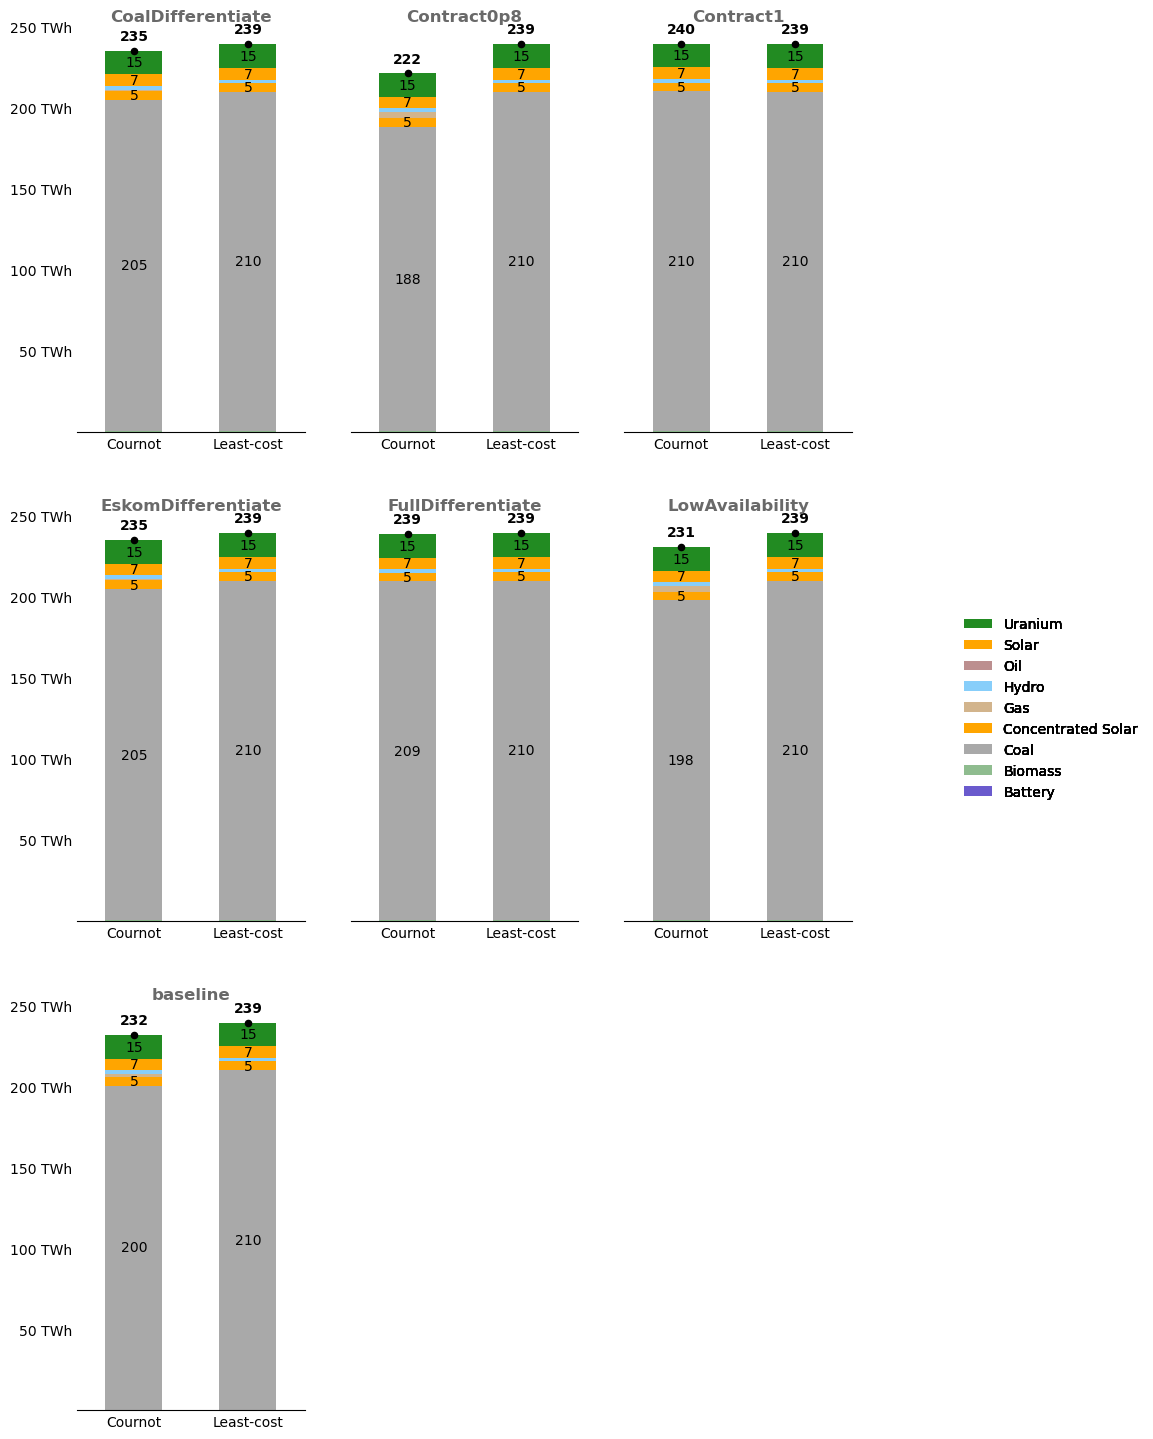

In [9]:
df = epm_results['pEnergyByFuel'].copy()
df['value'] = df['value'] / 1e6
filename = None
make_stacked_bar_subplots(df, filename, dict_specs['colors'], column_stacked='fuel', column_subplots='scenario',
                          column_value='value', column_multiple_bars='competition',
                          format_y=lambda y, _: '{:.0f} TWh'.format(y), annotation_format="{:.0f}", cap=5, show_total=True)

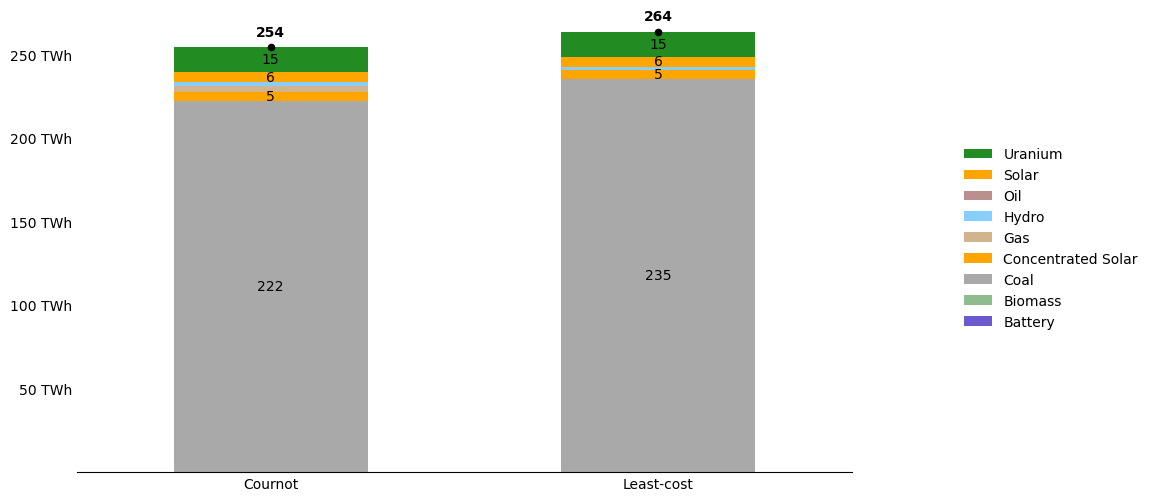

In [32]:
df = epm_results['pEnergyByFuel'].copy()
df['value'] = df['value'] / 1e6
filename = None
make_stacked_bar_subplots(df, filename, dict_specs['colors'], column_stacked='fuel', column_subplots='scenario',
                          column_value='value', column_multiple_bars='competition',
                          format_y=lambda y, _: '{:.0f} TWh'.format(y), annotation_format="{:.0f}", cap=5, show_total=True)

In [23]:
epm_results['pEnergyByFuel'].groupby(['scenario', 'competition'])['value'].sum()

scenario                      competition
Baseline                      Cournot        2.390407e+08
                              Least-cost     2.477245e+08
Fringe                        Cournot        2.475994e+08
                              Least-cost     2.477245e+08
simulation_CoalDifferentiate  Cournot        2.433755e+08
                              Least-cost     2.477245e+08
simulation_Contract0p8        Cournot        2.285719e+08
                              Least-cost     2.477245e+08
simulation_Contract1          Cournot        2.476551e+08
                              Least-cost     2.477245e+08
simulation_NewRepDays         Cournot        2.503212e+08
                              Least-cost     2.589955e+08
Name: value, dtype: float64

In [22]:
epm_results['pDemandTotal'].groupby(['scenario', 'competition'])['value'].sum()

scenario                      competition
Baseline                      Cournot        2.390407e+08
                              Least-cost     2.477245e+08
Fringe                        Cournot        2.475994e+08
                              Least-cost     2.477245e+08
simulation_CoalDifferentiate  Cournot        2.433755e+08
                              Least-cost     2.477245e+08
simulation_Contract0p8        Cournot        2.285719e+08
                              Least-cost     2.477245e+08
simulation_Contract1          Cournot        2.476551e+08
                              Least-cost     2.477245e+08
simulation_NewRepDays         Cournot        2.503212e+08
                              Least-cost     2.589955e+08
Name: value, dtype: float64

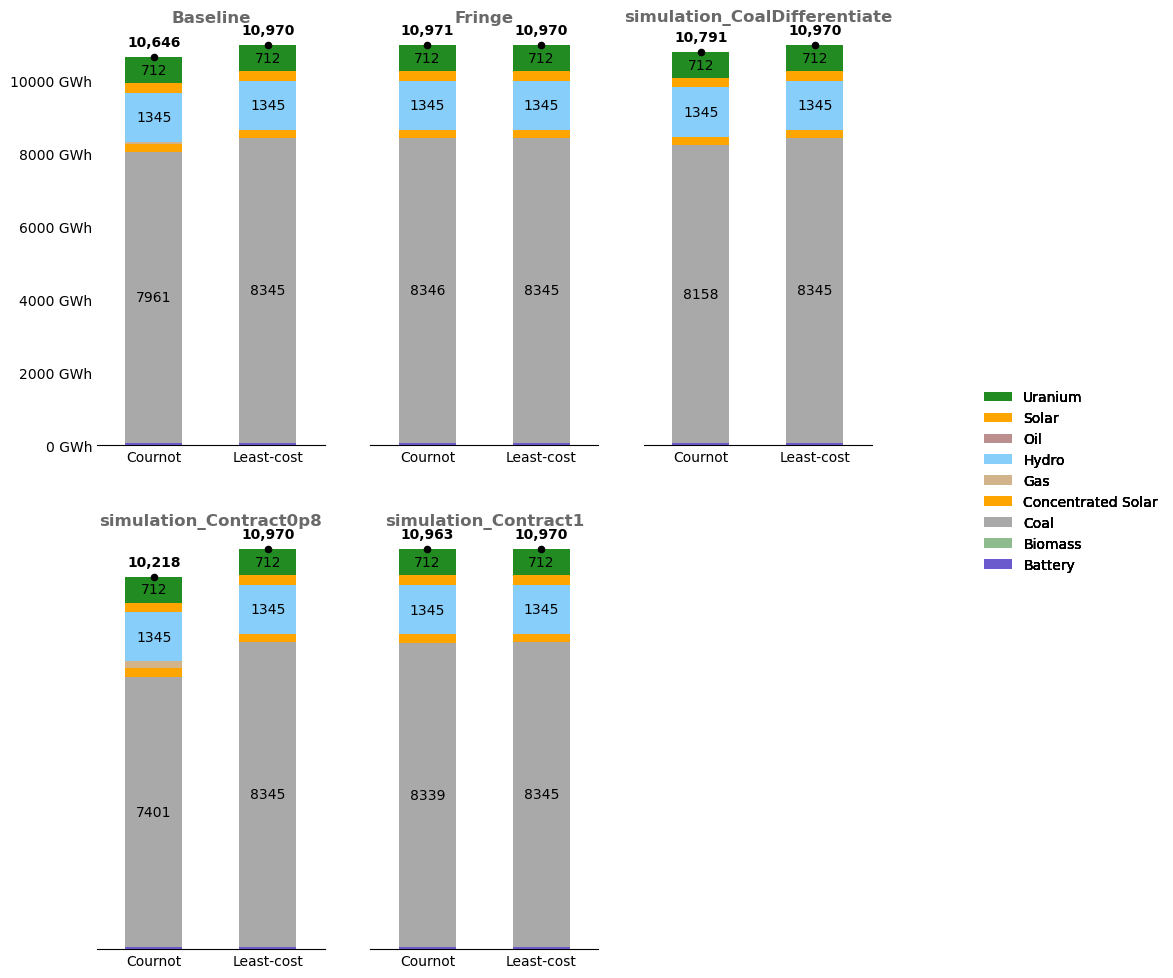

In [23]:
df = epm_results['pEnergyByFuel'].copy()
df['value'] = df['value'] / 1e3
filename = None
make_stacked_bar_subplots(df, filename, dict_specs['colors'], column_stacked='fuel', column_subplots='scenario',
                          column_value='value', column_multiple_bars='competition',
                          format_y=lambda y, _: '{:.0f} GWh'.format(y), annotation_format="{:.0f}", cap=500, show_total=True)

In [17]:
df = epm_results['pEnergyByFuelDispatch'].copy()
df["hour"] = df["t"].str.extract(r"(\d+)").astype(int).astype(str) + "h"

df["value"] = df["value"] * 1e-3

df["day_hour"] = df["day"].astype(str) + " - " + df["hour"]

In [18]:


def update_generation_plot(df, selected_season, selected_scenario):
    """
    Update the fuel dispatch plot based on user selection.
    """

    # df['value'] = df['value'] / 1e3
    # df = df.loc[(df.season == 'Q1') & (df.day == 'd1')]
    df = df.loc[(df.season == selected_season) & (df.scenario == selected_scenario)]
    
    filename = None
    
    make_multiple_lines_subplots(df, filename, dict_specs['colors'], column_subplots='fuel', column_xaxis='day_hour',
                              column_value='value', column_multiple_lines='competition',
                              format_y=lambda y, _: '{:.0f} GWh'.format(y), annotation_format="{:.0f}",
                                 max_ticks=10, rotation=45, select_subplots=['Coal', 'Hydro', 'Uranium', 'Solar'])
    
    
# Define available options
available_seasons = ['Q1', 'Q2', 'Q3', 'Q4']
available_scenarios = list(df.scenario.unique())  # Adjust based on your data

# Create widgets
season_dropdown = widgets.Dropdown(options=available_seasons, value='Q1', description="Season")
scenario_dropdown = widgets.Dropdown(options=available_scenarios, value='Baseline', description="Scenario")

# Display interactive controls
interact(lambda selected_season, selected_scenario: update_generation_plot(df, selected_season, selected_scenario),
         selected_season=season_dropdown, selected_scenario=scenario_dropdown)

interactive(children=(Dropdown(description='Season', options=('Q1', 'Q2', 'Q3', 'Q4'), value='Q1'), Dropdown(d…

<function __main__.<lambda>(selected_season, selected_scenario)>

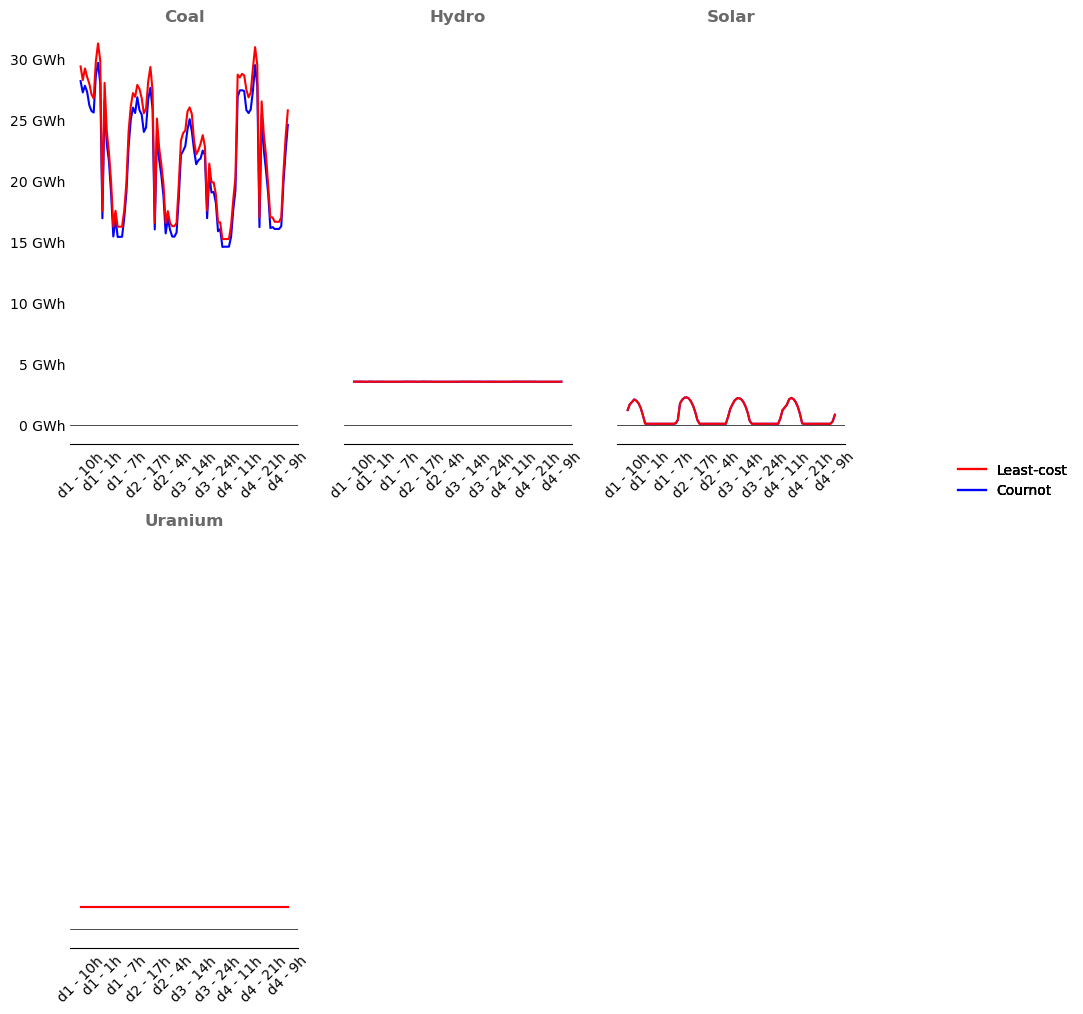

In [6]:
df = epm_results['pEnergyByFuelDispatch'].copy()
df["hour"] = df["t"].str.extract(r"(\d+)").astype(int).astype(str) + "h"

df["value"] = df["value"] * 1e-3

df["day_hour"] = df["day"].astype(str) + " - " + df["hour"]
# df['value'] = df['value'] / 1e3
# df = df.loc[(df.season == 'Q1') & (df.day == 'd1')]
df = df.loc[(df.season == 'Q2') & (df.scenario == 'Baseline')]

filename = None

make_multiple_lines_subplots(df, filename, dict_specs['colors'], column_subplots='fuel', column_xaxis='day_hour',
                          column_value='value', column_multiple_lines='competition',
                          format_y=lambda y, _: '{:.0f} GWh'.format(y), annotation_format="{:.0f}",
                             max_ticks=10, rotation=45, select_subplots=['Coal', 'Hydro', 'Uranium', 'Solar'])

### Energy pie plot

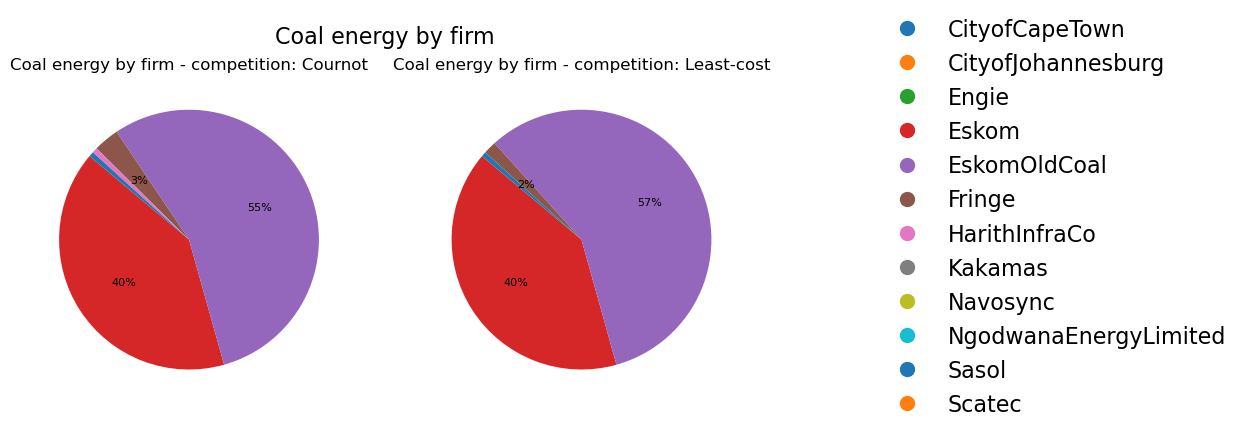

In [4]:
scenario, year = 'Baseline', 2025
scenario, year = 'simulation_CoalDifferentiate', 2025

df = epm_results['pEnergyFull'].copy()
df = df.loc[(df['year'] == year) & (df['scenario'] == scenario) & (df['fuel'] == 'Coal') ]
df = df.groupby(['scenario', 'competition', 'firm'])['value'].sum().reset_index()


subplot_pie_new(df, index='firm', dict_colors=None, subplot_column='competition', share_column='value', title='Coal energy by firm', figsize=(8,4), 
                percent_cap=1, filename=None, 
                bbox_to_anchor=(1.1, 0.5), loc='center left'
                )

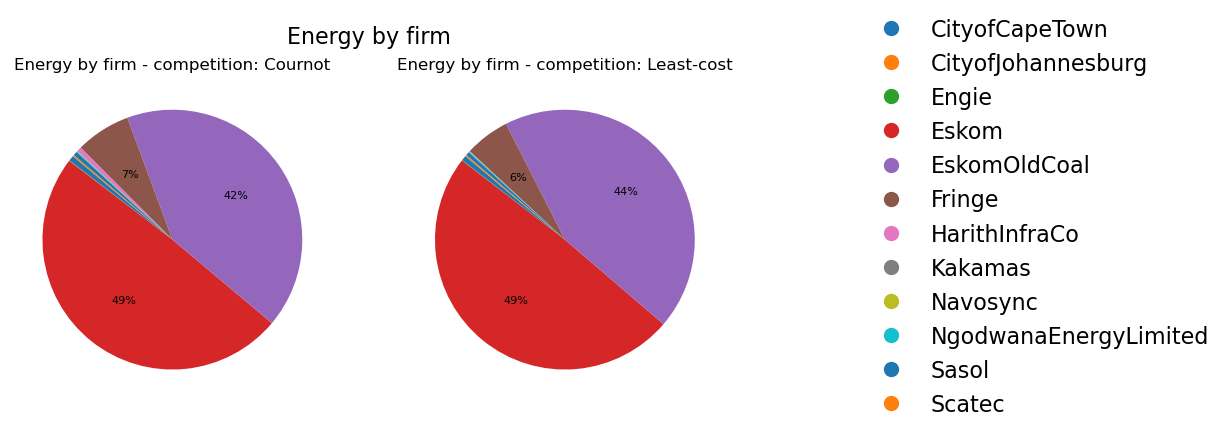

In [5]:
scenario, year = 'Baseline', 2025
scenario, year = 'simulation_CoalDifferentiate', 2025

df = epm_results['pEnergyByFirm'].copy()
df = df.loc[(df['year'] == year) & (df['scenario'] == scenario) ]


subplot_pie_new(df, index='firm', dict_colors=None, subplot_column='competition', title='Energy by firm', figsize=(8,4), 
                percent_cap=1, filename=None, 
                bbox_to_anchor=(1.1, 0.5), loc='center left'
                )

### Energy by firm

In [14]:
df = epm_results['pEnergyFull'].copy()
df 

,scenario,competition,year,fuel,tech,firm,firmstatus,value
0,CoalDifferentiateAge,Cournot,2025,Battery,STORAGE,Eskom,Cournot,9.685780e-01
1,CoalDifferentiateAge,Cournot,2025,Biomass,ST,Navosync,Fringe,1.228590e+05
2,CoalDifferentiateAge,Cournot,2025,Biomass,ST,NgodwanaEnergyLimited,Fringe,1.861500e+05
3,CoalDifferentiateAge,Cournot,2025,Concentrated Solar,CSP,Fringe,Fringe,5.256000e+06
4,CoalDifferentiateAge,Cournot,2025,Coal,ST,Eskom,Cournot,1.314511e+08
...,...,...,...,...,...,...,...,...
372,baseline,Least-cost,2025,Solar,PV,Scatec,Fringe,5.195472e+05
373,baseline,Least-cost,2025,Uranium,ST,Eskom,Cournot,1.461694e+07
374,baseline,Least-cost,2025,Hydro,ROR,Eskom,Cournot,1.944720e+06
375,baseline,Least-cost,2025,Hydro,ROR,Fringe,Fringe,1.620600e+05


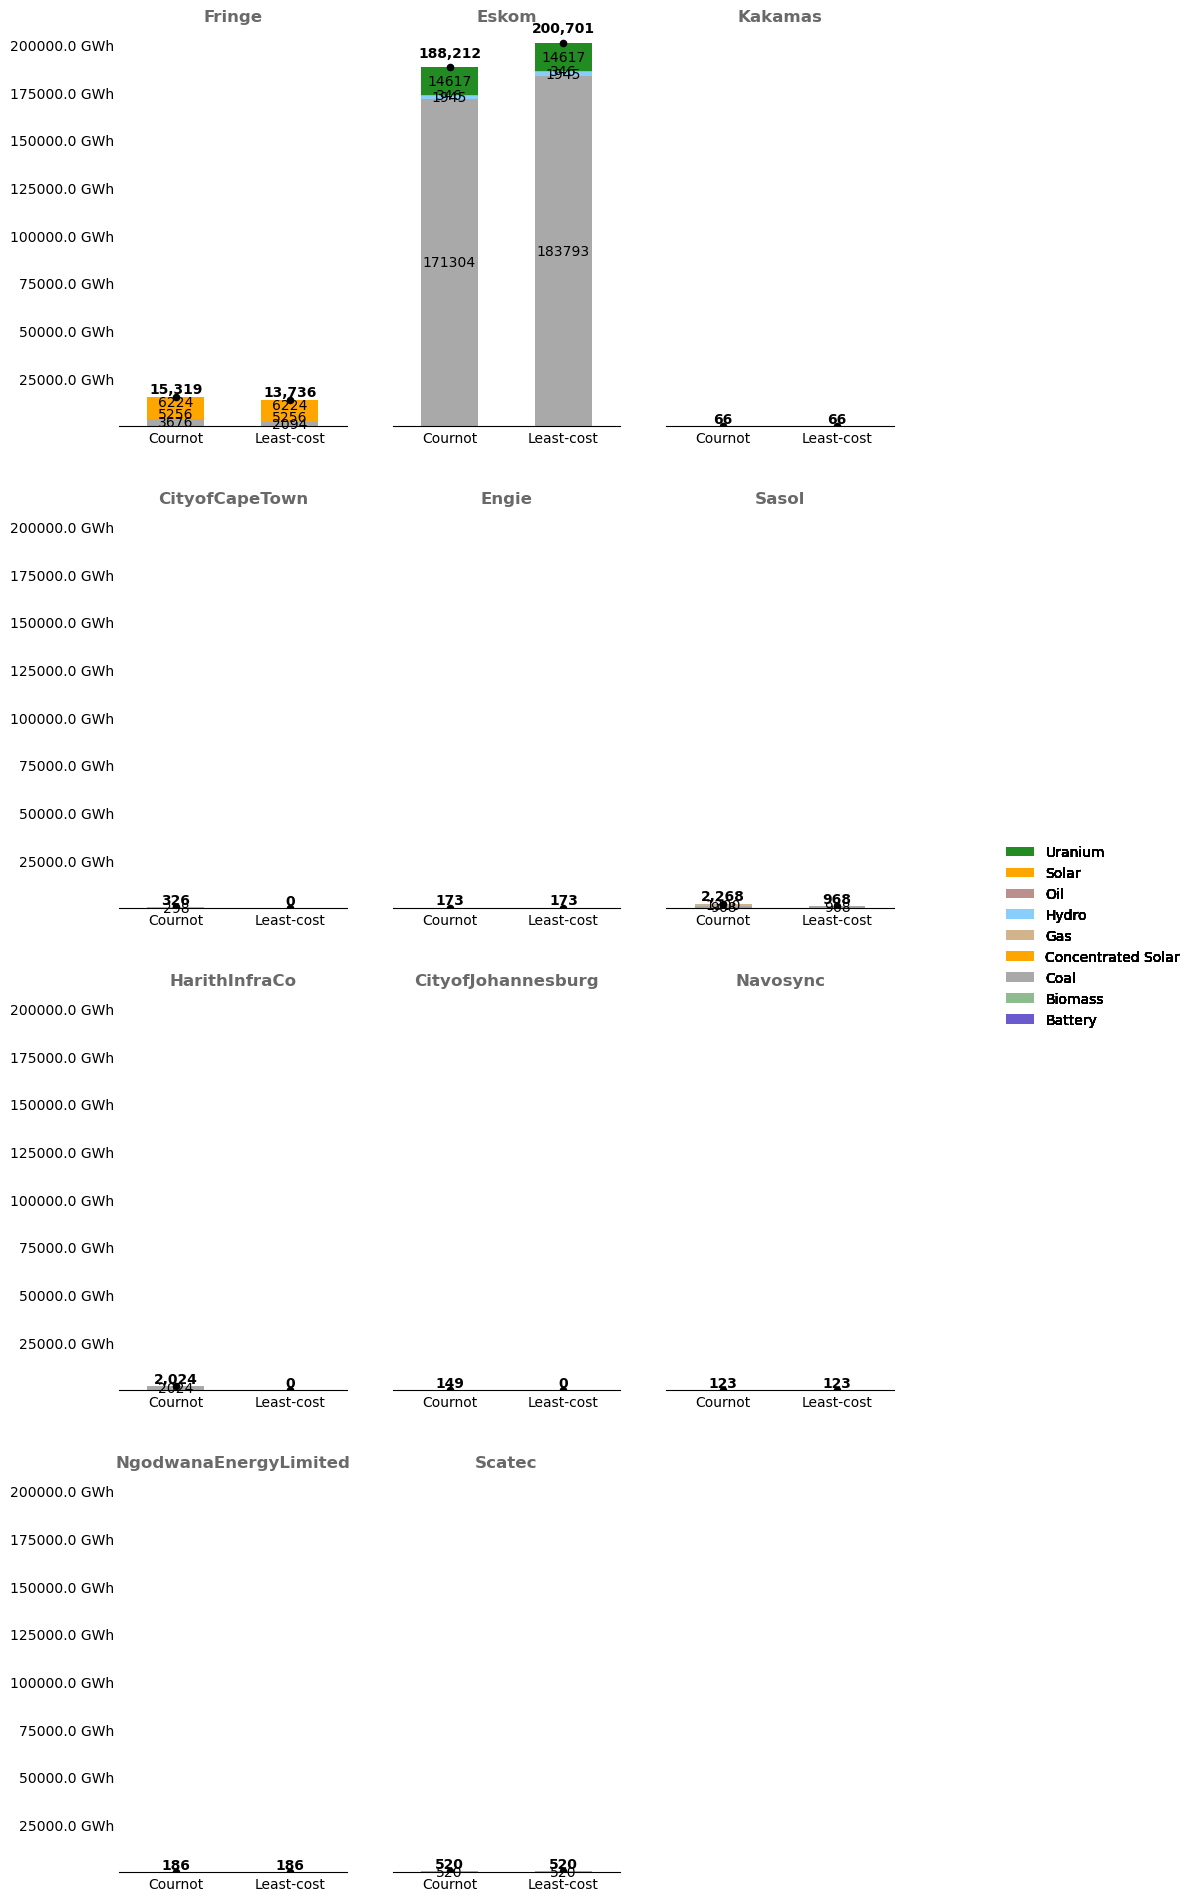

In [27]:
scenario = 'Current'
# scenario = 'Baseline'

df = epm_results['pEnergyFull'].copy()
df['value'] = df['value'] / 1e3

df = df.loc[df.scenario == scenario]
filename = None
make_stacked_bar_subplots(df, filename, dict_specs['colors'], column_stacked='fuel', column_subplots='firm',
                          column_value='value', column_multiple_bars='competition',
                          format_y=lambda y, _: '{:.1f} GWh'.format(y), annotation_format="{:.0f}", cap=200, show_total=True)

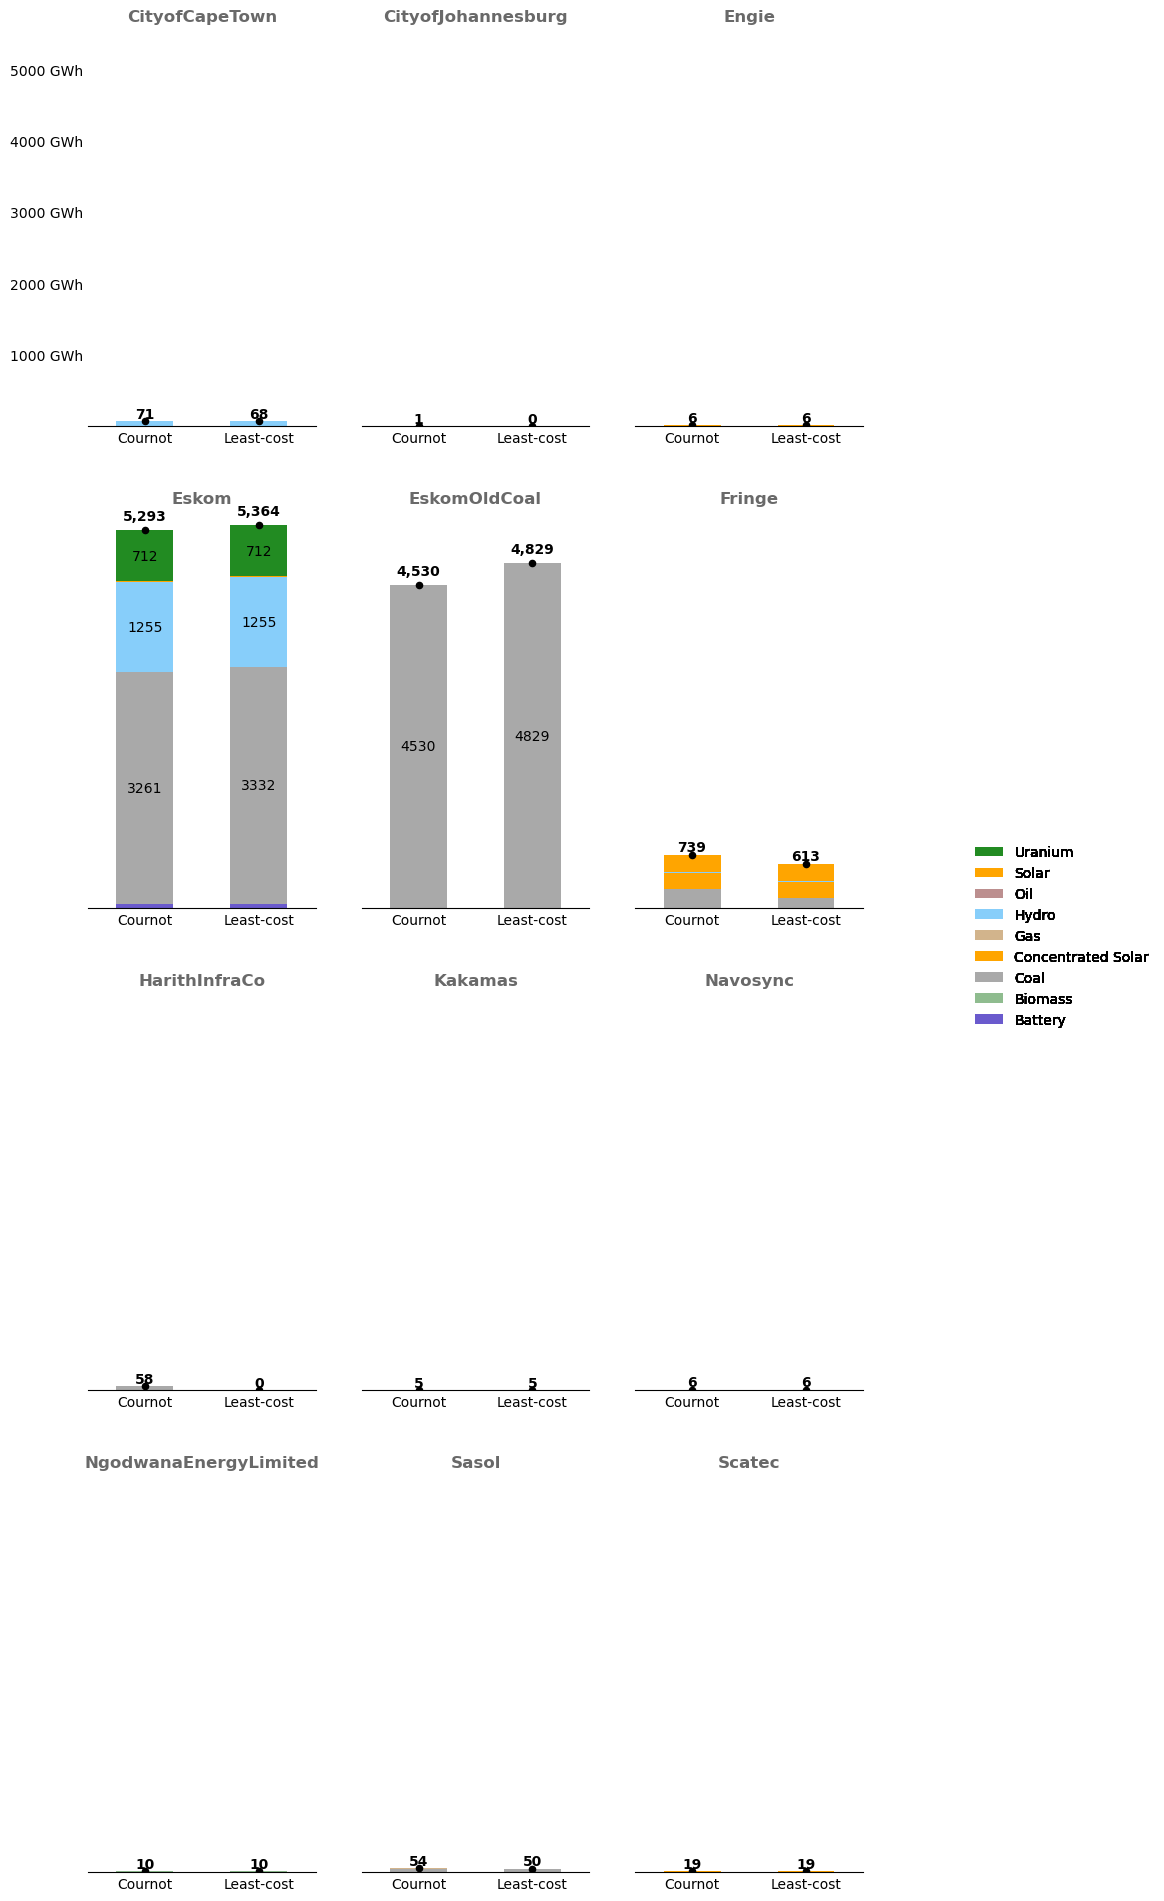

In [33]:
scenario = 'simulation_CoalDifferentiate'
# scenario = 'Baseline'

df = epm_results['pGenSupplyWithCost']
df = df.groupby(['scenario', 'competition', 'firm', 'fuel'])['generation'].sum().reset_index()
df['generation'] = df['generation'] / 1e3

df = df.loc[df.scenario == scenario]
filename = None
make_stacked_bar_subplots(df, filename, dict_specs['colors'], column_stacked='fuel', column_subplots='firm',
                          column_value='generation', column_multiple_bars='competition',
                          format_y=lambda y, _: '{:.0f} GWh'.format(y), annotation_format="{:.0f}", cap=500, show_total=True)

### Evolution by plant

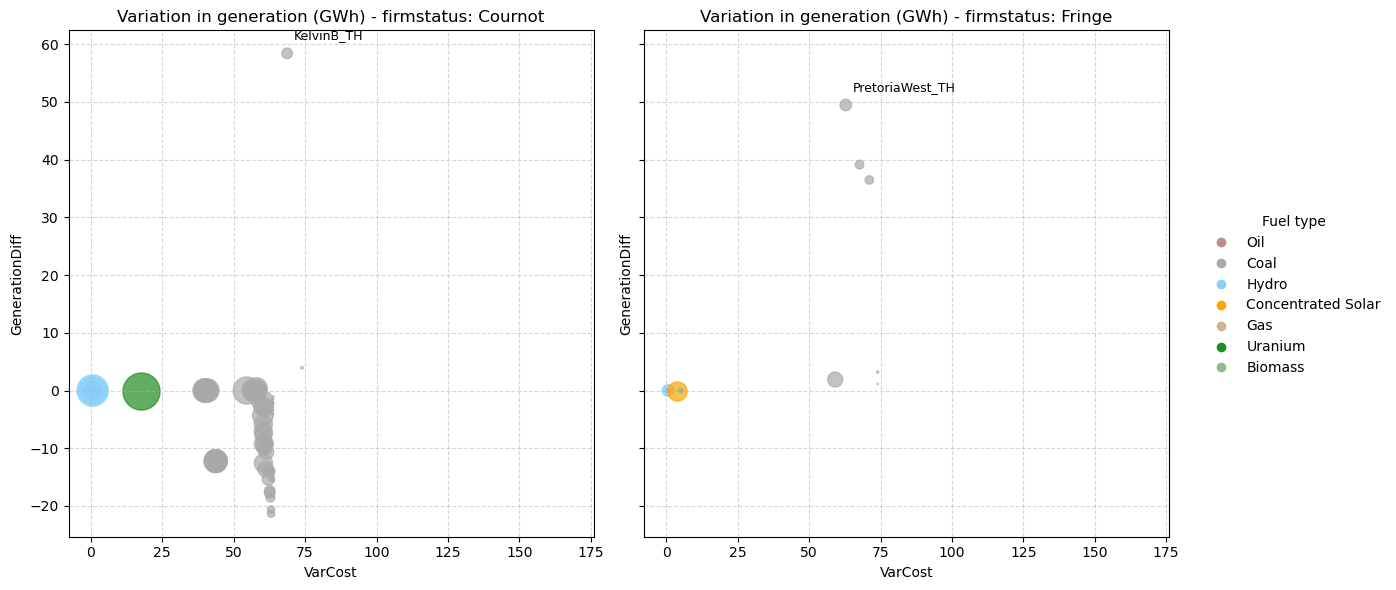

In [32]:
x_column = 'VarCost'
y_column = 'GenerationDiff'
color_col = 'fuel'
column_annotate = 'GenerationDiff'
column_scale = 'generation Cournot'
scenario = 'Baseline'
scenario = 'simulation_CoalDifferentiate'

tmp = epm_results['pGenSupplyWithCost'].copy().set_index(['scenario', 'competition', 'generator', 'year', 'season', 'day', 't', 'VarCost', 'fuel', 'tech', 'firm', 'firmstatus']).unstack('competition')
tmp = tmp.reset_index()
tmp.columns = [' '.join(col).strip() for col in tmp.columns.values]
# sum over all year
tmp = tmp.loc[(tmp.scenario == scenario)].groupby(['scenario', 'generator', 'fuel', 'firmstatus', 'VarCost'], observed=False)[['generation Cournot', 'generation Least-cost']].sum().reset_index()

tmp.loc[:, 'GenerationDiff'] = (tmp.loc[:, 'generation Cournot'] - tmp.loc[:, 'generation Least-cost']) 
tmp = tmp.dropna()
tmp = tmp[tmp['GenerationDiff'] != 0]
tmp.loc[:, 'GenerationDiff'] = tmp.loc[:, 'GenerationDiff'] * 1e-3
# tmp = tmp.loc[(tmp.scenario == scenario) & (tmp.season == 'Q1') & (tmp.day == 'd1') & (tmp.t == 't15')]
tmp = tmp.loc[(tmp.scenario == scenario)]

filename = None # Only for display in the notebook
subplot_scatter(tmp, x_column, y_column, color_col, dict_specs['colors'],
                            ymax=None, title='Variation in generation (GWh)', legend='Fuel type',
                            filename=filename, xmax=None, size_scale=0.001, column_scale=column_scale, annotate_thresh=40, column_annotate=column_annotate,
                             subplot_column='firmstatus', figsize=(6,6)
                             )

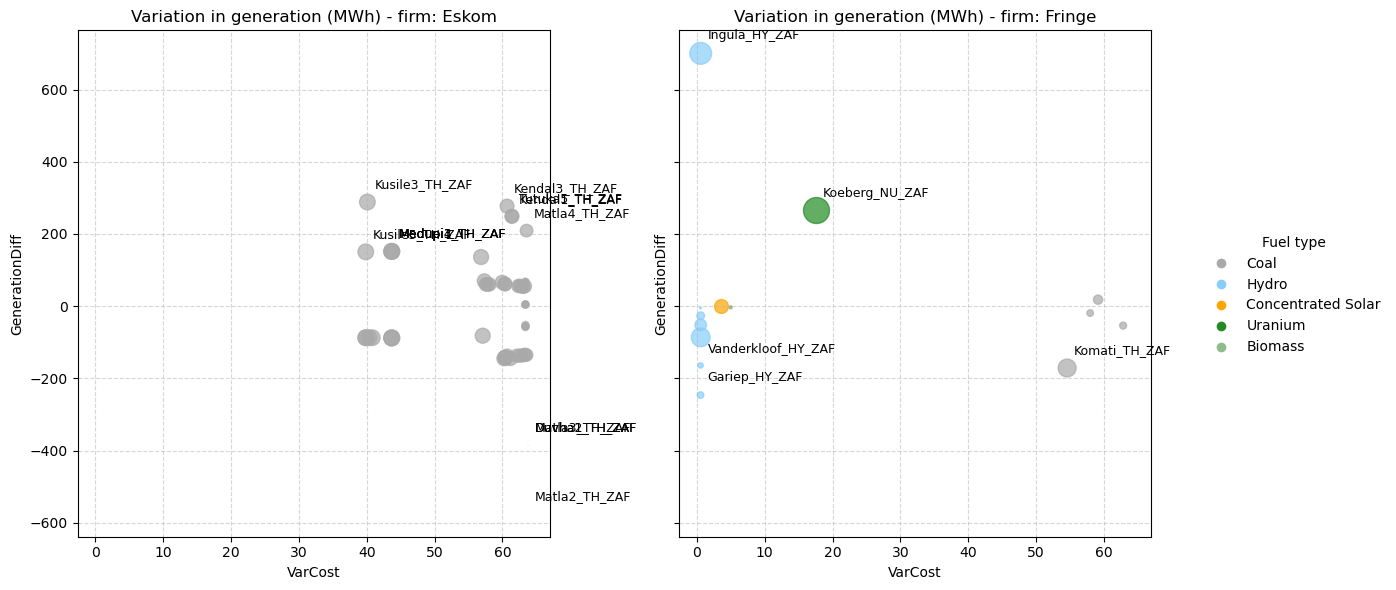

In [21]:
x_column = 'VarCost'
y_column = 'GenerationDiff'
color_col = 'fuel'
column_annotate = 'GenerationDiff'
column_scale = 'generation Cournot'

scenario = 'Baseline'

tmp = epm_results['pGenSupplyWithCost'].copy().set_index(['scenario', 'competition', 'generator', 'year', 'season', 'day', 't', 'VarCost', 'fuel', 'tech', 'firm']).unstack('competition')
tmp = tmp.reset_index()
tmp.columns = [' '.join(col).strip() for col in tmp.columns.values]

tmp.loc[:, 'GenerationDiff'] = (tmp.loc[:, 'generation Cournot'] - tmp.loc[:, 'generation Least-cost']) 
tmp = tmp.dropna()
tmp = tmp[tmp['GenerationDiff'] != 0]

tmp = tmp.loc[(tmp.scenario == scenario) & (tmp.season == 'Q1') & (tmp.day == 'd1') & (tmp.t == 't15')]


filename = None # Only for display in the notebook
subplot_scatter(tmp, x_column, y_column, color_col, dict_specs['colors'],
                            ymax=None, title='Variation in generation (MWh)', legend='Fuel type',
                            filename=filename, xmax=None, size_scale=0.2, column_scale=column_scale, annotate_thresh=150, column_annotate=column_annotate,
                             subplot_column='firm', figsize=(6,6)
                             )

In [34]:
tmp = epm_results['pGenSupplyWithCost'].copy().set_index(['scenario', 'competition', 'generator', 'year', 'season', 'day', 't', 'VarCost', 'fuel', 'tech', 'firm']).unstack('competition')
tmp = tmp.reset_index()
tmp.columns = [' '.join(col).strip() for col in tmp.columns.values]
# sum over all year
tmp = tmp.loc[(tmp.scenario == 'Baseline')].groupby(['scenario', 'generator', 'fuel', 'firm', 'VarCost'], observed=False)[['generation Cournot', 'generation Least-cost']].sum().reset_index()
tmp.loc[:, 'GenerationDiff'] = (tmp.loc[:, 'generation Cournot'] - tmp.loc[:, 'generation Least-cost']) 
tmp = tmp.dropna()
tmp = tmp[tmp['GenerationDiff'] != 0]
tmp.sort_values(by='GenerationDiff', ascending=False)

,scenario,generator,fuel,firm,VarCost,generation Cournot,generation Least-cost,GenerationDiff
104972,Baseline,Matla3_TH_ZAF,Coal,Eskom,63.794861,84829.512322,76256.500000,8573.012322
22892,Baseline,Duvha2_TH_ZAF,Coal,Eskom,63.794861,84829.512322,77945.897128,6883.615194
108046,Baseline,Matla6_TH_ZAF,Coal,Eskom,63.076836,143519.981185,137055.902360,6464.078825
105997,Baseline,Matla4_TH_ZAF,Coal,Eskom,63.555519,114843.980710,108666.918232,6177.062478
103946,Baseline,Matla2_TH_ZAF,Coal,Eskom,63.794861,84829.512322,78717.500000,6112.012322
...,...,...,...,...,...,...,...,...
126442,Baseline,Secunda(SasolChemical)_TH_ZAF,Coal,Fringe,57.968191,0.003695,42432.000000,-42431.996305
121325,Baseline,PretoriaWest_TH_ZAF,Coal,Fringe,62.822824,0.003308,44928.000000,-44927.996692
124392,Baseline,Rooiwal_TH_ZAF,Coal,Fringe,59.129673,0.003606,74880.000000,-74879.996394
71032,Baseline,Komati_TH_ZAF,Coal,Fringe,54.574485,0.004055,249600.000000,-249599.995945


## Dispatch

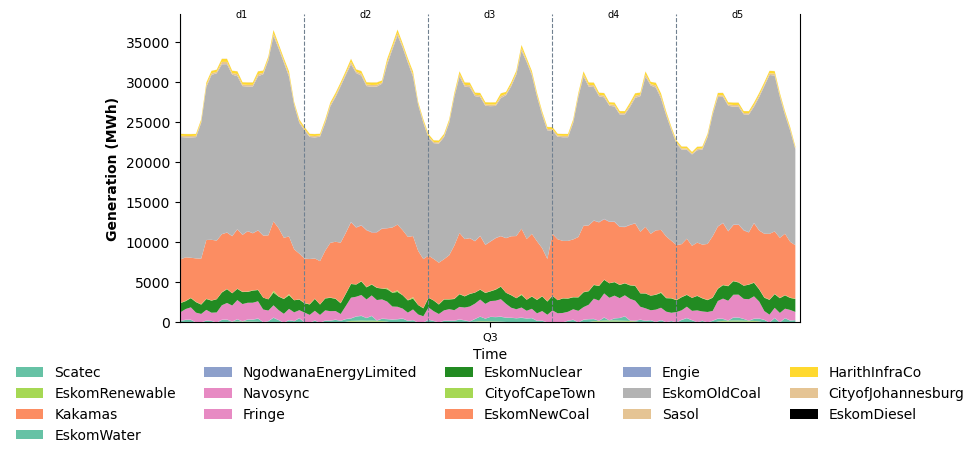

In [30]:
dfs_to_plot_area = {
    'pEnergyFullDispatch': epm_results['pEnergyFullDispatch'][['scenario', 'competition', 'year', 'season', 'day', 't', 'firm', 'generation']]
}

dfs_to_plot_line = {
    # 'pDemand': epm_results['pDemand']
}



selected_scenario = 'EskomDifferentiate'
competition = 'Cournot'

tmp = epm_results['pEnergyFullDispatch'].copy()
avg_varcost = tmp.groupby(['scenario', 'competition', 'fuel', 'firm'])['VarCost'].mean().reset_index().rename(columns={'VarCost': 'Avg VarCost'}).fillna(0)
avg_varcost = avg_varcost.sort_values(by=['Avg VarCost'])

avg_varcost = avg_varcost.groupby(['firm'])['Avg VarCost'].mean().reset_index()
avg_varcost = avg_varcost.sort_values(by=['Avg VarCost'])
firms_ordered = avg_varcost['firm'].drop_duplicates().tolist()


filename = None # Only for display in the notebook

select_time = {
    'season': ['Q3'],
    'day': ['d1', 'd2', 'd3', 'd4', 'd5']
}

name_columns = {
    'pEnergyFullDispatch': 'firm'
}
make_complete_fuel_dispatch_plot(dfs_to_plot_area, dfs_to_plot_line, dict_colors=dict_specs['colors'], name_columns_spec=name_columns,
                                 year=2025, scenario=selected_scenario, competition=competition, zone=REGION_NAME,
                                 fuel_grouping=None, select_time=select_time, filename=filename, reorder_dispatch=firms_ordered,
                                 figsize=(8,4))   

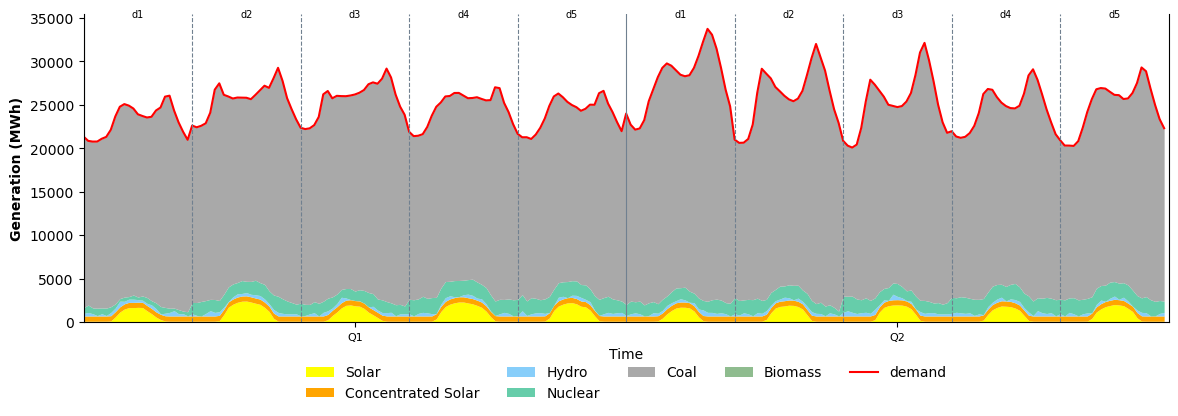

In [8]:
dispatch_df = epm_results['pEnergyByFuelDispatch'].copy()
dispatch_df['fuel'] = dispatch_df['fuel'].replace({'Uranium': 'Nuclear'})

dfs_to_plot_area = {
    'pEnergyByFuelDispatch': dispatch_df,
    'pDispatch': filter_dataframe(epm_results['pDispatch'], {'attribute': ['Unmet demand']})
}

dfs_to_plot_line = {
    'pDemand': epm_results['pDemand']
}

selected_scenario = 'baseline'
competition = 'Least-cost'
year = 2025

filename = None # Only for display in the notebook

select_time = {
    'season': ['Q1', 'Q2'],
    'day': ['d1', 'd2', 'd3', 'd4', 'd5']
}

# select_time = {
#     'season': ['Q3'],
#     'day': ['d1', 'd2', 'd3']
# }

make_complete_fuel_dispatch_plot(dfs_to_plot_area, dfs_to_plot_line, dict_colors=dict_specs['colors'],
                                 year=year, scenario=selected_scenario, competition=competition, zone=REGION_NAME,
                                 fuel_grouping=None, select_time=select_time, filename=filename, reorder_dispatch=['Solar', 'Concentrated Solar', 'Hydro', 'Nuclear', 'Coal', 'Gas', 'Oil'],
                                 figsize=(14,4))   

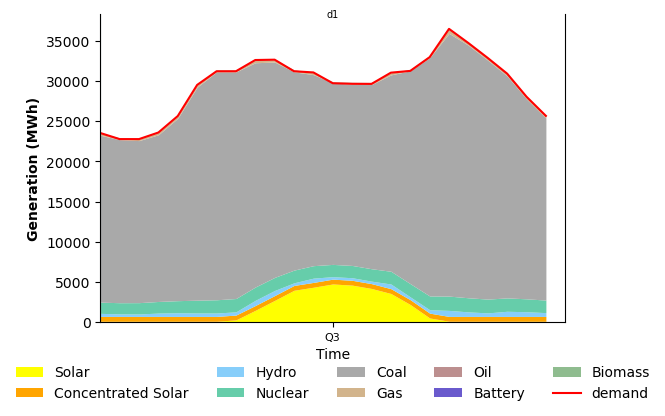

In [22]:
dispatch_df = epm_results['pEnergyByFuelDispatch'].copy()
dispatch_df['fuel'] = dispatch_df['fuel'].replace({'Uranium': 'Nuclear'})

dfs_to_plot_area = {
    'pEnergyByFuelDispatch': dispatch_df,
    'pDispatch': filter_dataframe(epm_results['pDispatch'], {'attribute': ['Unmet demand']})
}

dfs_to_plot_line = {
    'pDemand': epm_results['pDemand']
}

selected_scenario = 'Mix2027'
competition = 'Cournot'
year = 2027

filename = None # Only for display in the notebook

select_time = {
    'season': ['Q1', 'Q2'],
    'day': ['d1', 'd2', 'd3', 'd4', 'd5']
}

select_time = {
    'season': ['Q3'],
    'day': ['d1']
}

make_complete_fuel_dispatch_plot(dfs_to_plot_area, dfs_to_plot_line, dict_colors=dict_specs['colors'],
                                 year=year, scenario=selected_scenario, competition=competition, zone=REGION_NAME,
                                 fuel_grouping=None, select_time=select_time, filename=filename, reorder_dispatch=['Solar', 'Concentrated Solar', 'Hydro', 'Nuclear', 'Coal', 'Gas', 'Oil'],
                                 figsize=(6,4))   

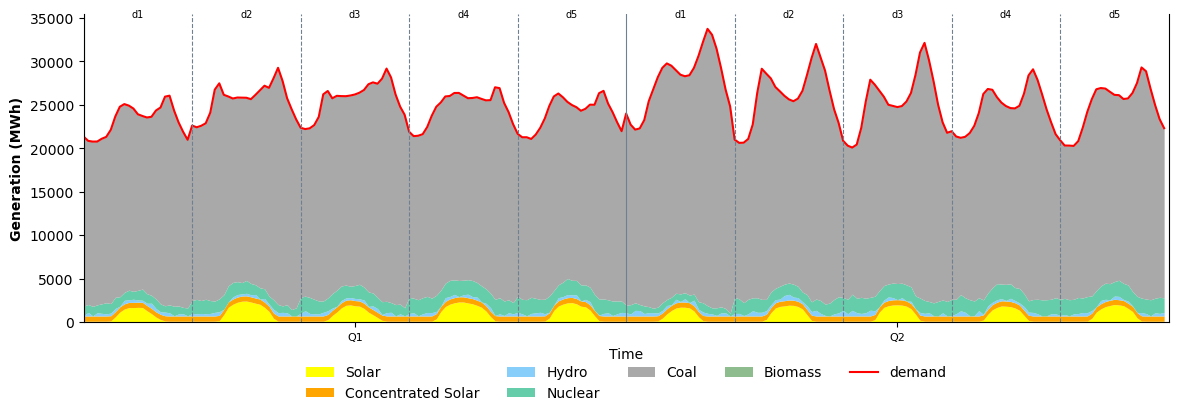

In [17]:
dispatch_df = epm_results['pEnergyByFuelDispatch'].copy()
dispatch_df['fuel'] = dispatch_df['fuel'].replace({'Uranium': 'Nuclear'})

dfs_to_plot_area = {
    'pEnergyByFuelDispatch': dispatch_df,
    'pDispatch': filter_dataframe(epm_results['pDispatch'], {'attribute': ['Unmet demand']})
}

dfs_to_plot_line = {
    'pDemand': epm_results['pDemand']
}

selected_scenario = 'baseline'
competition = 'Least-cost'
year = 2025

filename = None # Only for display in the notebook

select_time = {
    'season': ['Q1', 'Q2'],
    'day': ['d1', 'd2', 'd3', 'd4', 'd5']
}

make_complete_fuel_dispatch_plot(dfs_to_plot_area, dfs_to_plot_line, dict_colors=dict_specs['colors'],
                                 year=year, scenario=selected_scenario, competition=competition, zone=REGION_NAME,
                                 fuel_grouping=None, select_time=select_time, filename=filename, reorder_dispatch=['Solar', 'Concentrated Solar', 'Hydro', 'Nuclear', 'Coal', 'Gas', 'Oil'],
                                 figsize=(14,4))   

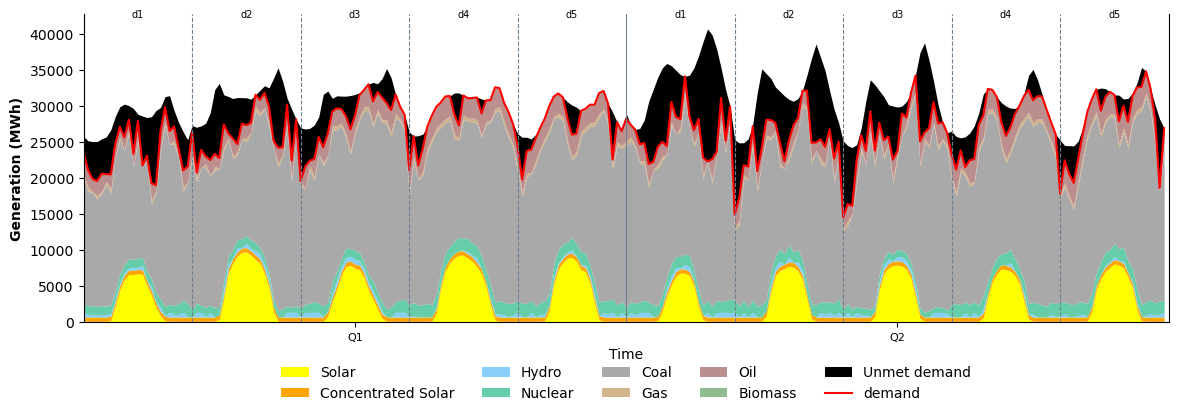

In [27]:
dispatch_df = epm_results['pEnergyByFuelDispatch'].copy()
dispatch_df['fuel'] = dispatch_df['fuel'].replace({'Uranium': 'Nuclear'})

dfs_to_plot_area = {
    'pEnergyByFuelDispatch': dispatch_df,
    'pDispatch': filter_dataframe(epm_results['pDispatch'], {'attribute': ['Unmet demand']})
}

dfs_to_plot_line = {
    'pDemand': epm_results['pDemand']
}

selected_scenario = 'Mix2030'
competition = 'Least-cost'
year = 2030

filename = None # Only for display in the notebook

select_time = {
    'season': ['Q1', 'Q2'],
    'day': ['d1', 'd2', 'd3', 'd4', 'd5']
}

make_complete_fuel_dispatch_plot(dfs_to_plot_area, dfs_to_plot_line, dict_colors=dict_specs['colors'],
                                 year=year, scenario=selected_scenario, competition=competition, zone=REGION_NAME,
                                 fuel_grouping=None, select_time=select_time, filename=filename, reorder_dispatch=['Solar', 'Concentrated Solar', 'Hydro', 'Nuclear', 'Coal', 'Gas', 'Oil'],
                                 figsize=(14,4))   

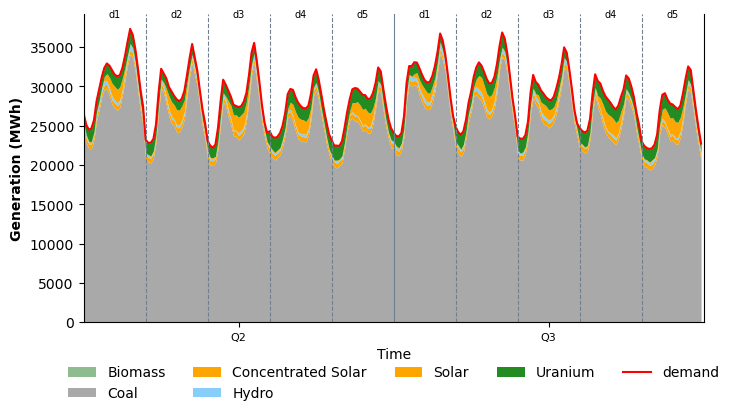

In [11]:
dfs_to_plot_area = {
    'pEnergyByFuelDispatch': epm_results['pEnergyByFuelDispatch'],
    'pDispatch': filter_dataframe(epm_results['pDispatch'], {'attribute': ['Unmet demand']})
}

dfs_to_plot_line = {
    'pDemand': epm_results['pDemand']
}

selected_scenario = 'Current'
competition = 'Least-cost'

filename = None # Only for display in the notebook

select_time = {
    'season': ['Q2', 'Q3'],
    'day': ['d1', 'd2', 'd3', 'd4', 'd5']
}

make_complete_fuel_dispatch_plot(dfs_to_plot_area, dfs_to_plot_line, dict_colors=dict_specs['colors'],
                                 year=2025, scenario=selected_scenario, competition=competition, zone=REGION_NAME,
                                 fuel_grouping=None, select_time=select_time, filename=filename,
                                 figsize=(8,4))   

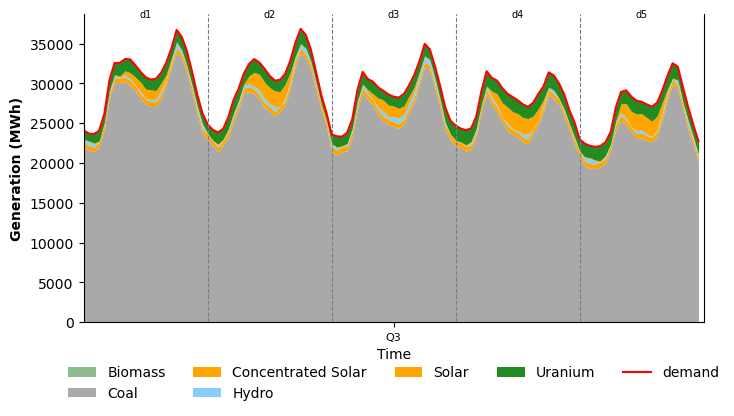

In [10]:
dfs_to_plot_area = {
    'pEnergyByFuelDispatch': epm_results['pEnergyByFuelDispatch'],
}

dfs_to_plot_line = {
    'pDemand': epm_results['pDemand']
}

selected_scenario = 'baseline'
competition = 'Least-cost'

filename = None # Only for display in the notebook

select_time = {
    'season': ['Q3'],
    'day': ['d1', 'd2', 'd3', 'd4', 'd5']
}

make_complete_fuel_dispatch_plot(dfs_to_plot_area, dfs_to_plot_line, dict_colors=dict_specs['colors'],
                                 year=2025, scenario=selected_scenario, competition=competition, zone=REGION_NAME,
                                 fuel_grouping=None, select_time=select_time, filename=filename,
                                 figsize=(8,4))   

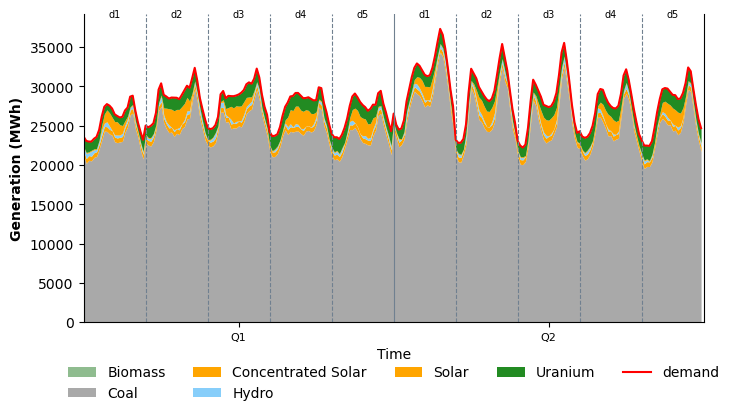

In [15]:
dfs_to_plot_area = {
    'pEnergyByFuelDispatch': epm_results['pEnergyByFuelDispatch'],
}

dfs_to_plot_line = {
    'pDemand': epm_results['pDemand']
}

selected_scenario = 'baseline'
competition = 'Least-cost'

filename = None # Only for display in the notebook

select_time = {
    'season': ['Q1', 'Q2'],
    'day': ['d1', 'd2', 'd3', 'd4', 'd5']
}

make_complete_fuel_dispatch_plot(dfs_to_plot_area, dfs_to_plot_line, dict_colors=dict_specs['colors'],
                                 year=2025, scenario=selected_scenario, competition=competition, zone=REGION_NAME,
                                 fuel_grouping=None, select_time=select_time, filename=filename,
                                 figsize=(8,4))   

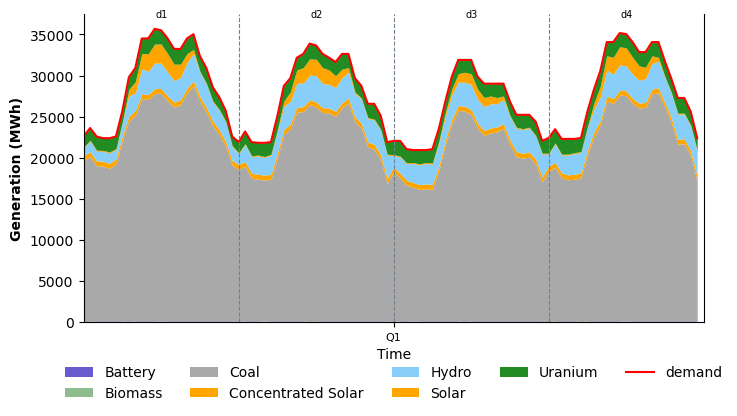

In [19]:
dfs_to_plot_area = {
    'pEnergyByFuelDispatch': epm_results['pEnergyByFuelDispatch'],
}

dfs_to_plot_line = {
    'pDemand': epm_results['pDemand']
}

selected_scenario = 'Baseline'
competition = 'Least-cost'

filename = None # Only for display in the notebook

select_time = {
    'season': ['Q1'],
    'day': ['d1', 'd2', 'd3', 'd4']
}

make_complete_fuel_dispatch_plot(dfs_to_plot_area, dfs_to_plot_line, dict_colors=dict_specs['colors'],
                                 year=2025, scenario=selected_scenario, competition=competition, zone=REGION_NAME,
                                 fuel_grouping=None, select_time=select_time, filename=filename,
                                 figsize=(8,4))   

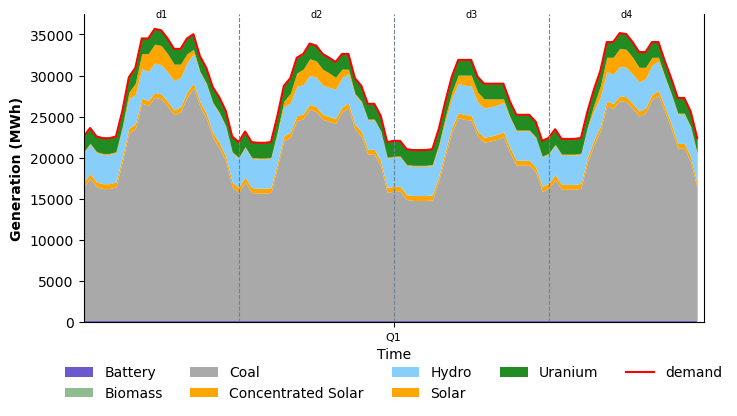

In [13]:
dfs_to_plot_area = {
    'pEnergyByFuelDispatch': epm_results['pEnergyByFuelDispatch'],
}

dfs_to_plot_line = {
    'pDemand': epm_results['pDemand']
}

selected_scenario = 'Baseline'
competition = 'Least-cost'

filename = None # Only for display in the notebook

select_time = {
    'season': ['Q1'],
    'day': ['d1', 'd2', 'd3', 'd4']
}

make_complete_fuel_dispatch_plot(dfs_to_plot_area, dfs_to_plot_line, dict_colors=dict_specs['colors'],
                                 year=2025, scenario=selected_scenario, competition=competition, zone=REGION_NAME,
                                 fuel_grouping=None, select_time=select_time, filename=filename,
                                 figsize=(8,4))   

In [5]:
def update_dispatch_plot(selected_season, selected_scenario, competition):
    """
    Update the fuel dispatch plot based on user selection.
    """
    select_time = {'season': [selected_season], 'day': ['d1', 'd2', 'd3', 'd4']}  # Adjust as needed

    make_complete_fuel_dispatch_plot(
        dfs_area=dfs_to_plot_area,
        dfs_line=dfs_to_plot_line,
        dict_colors=dict_specs['colors'],
        year=2025,
        scenario=selected_scenario,
        competition=competition,
        zone=REGION_NAME,
        fuel_grouping=None,
        select_time=select_time,
        filename=None,
        figsize=(8,4)
    )
    
    
# Define available options
available_seasons = ['Q1', 'Q2', 'Q3', 'Q4']
available_scenarios = list(epm_results['pEnergyByFuelDispatch'].scenario.unique())  # Adjust based on your data
available_competitions = ['Least-cost', 'Cournot'] 

# Create widgets
season_dropdown = widgets.Dropdown(options=available_seasons, value='Q1', description="Season")
scenario_dropdown = widgets.Dropdown(options=available_scenarios, value='Baseline', description="Scenario")
competition_dropdown = widgets.Dropdown(options=available_competitions, value='Least-cost', description="Competition")

# Display interactive controls
interact(update_dispatch_plot, selected_season=season_dropdown, selected_scenario=scenario_dropdown, competition=competition_dropdown)

interactive(children=(Dropdown(description='Season', options=('Q1', 'Q2', 'Q3', 'Q4'), value='Q1'), Dropdown(d…

<function __main__.update_dispatch_plot(selected_season, selected_scenario, competition)>

## Coal plants description

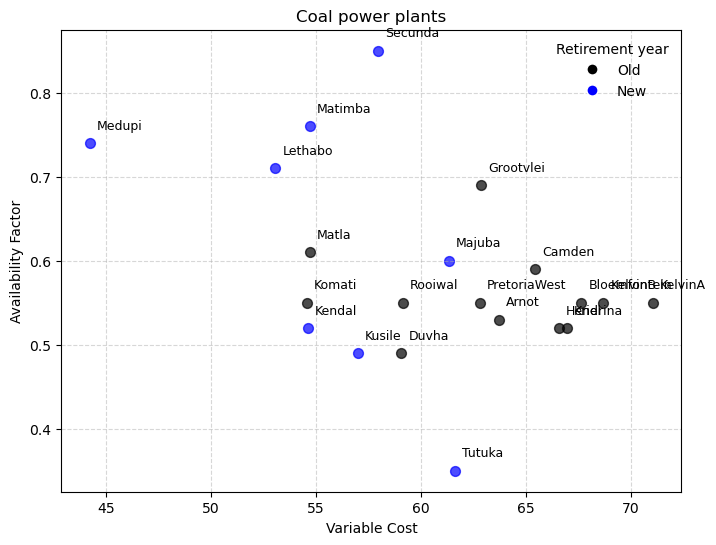

In [81]:
import re 

scenarios = pd.read_csv(Path(results_folder) / Path('simulation_scenarios.csv'), index_col=0)
pAvailability = scenarios.loc['pAvailability', 'baseline']
pAvailability = pd.read_csv(pAvailability, index_col=[0])
pAvailability.index.names = ['generator']
# pAvailability = pAvailability.reset_index()
pAvailability['Availability Factor'] = pAvailability.mean(axis=1)
pAvailability = pAvailability[['Availability Factor']]
pAvailability = pAvailability.reset_index()

pGenData = scenarios.loc['pGenData', 'baseline']
pGenData = pd.read_csv(pGenData, index_col=[0])
pGenData = pGenData.rename_axis( 'generator', axis=0)
pGenData = pGenData.loc[pGenData.Fuel == 'Coal']
pGenData = pGenData[['ReYr']]
pGenData = pGenData.reset_index()

pVarCost = epm_results['pVarCost'].copy()
pVarCost = pVarCost.loc[pVarCost.scenario == 'baseline',['generator', 'value']].rename(columns={'value':'Variable Cost'})

df = pGenData.merge(pVarCost, on='generator', how='left')
df = df.merge(pAvailability, on='generator', how='left')

df['status'] = df.apply(lambda row: 1 if row['ReYr'] < 2035 else 0, axis=1)

# Extract the base name (e.g., "Arnot" from "Arnot1_TH")
df['generator_group'] = df['generator'].apply(lambda x: re.match(r"([A-Za-z]+)", x).group(1) if re.match(r"([A-Za-z]+)", x) else x)
df_grouped = df.groupby('generator_group').mean(numeric_only=True).reset_index()
df_grouped = df_grouped.rename(columns={'generator_group':'generator'})
df_grouped['status'] = df_grouped['status'].map({1: 'Old', 0: 'New'})
df_grouped

x_column = 'Variable Cost'
y_column = 'Availability Factor'
color_col = 'status'
column_annotate = 'Variable Cost'

filename = None # Only for display in the notebook

colors = dict_specs['colors']
colors.update({
    'Old': 'black',
    'New': 'blue'
})
subplot_scatter(df_grouped, x_column, y_column, color_col, colors,
                            ymax=None, title='Coal power plants', legend='Retirement year',
                            filename=filename, xmax=None,  size_scale=None, annotate_thresh=0, column_annotate=column_annotate,
                            figsize=(6,6)
                             )

In [58]:
x_column = 'VarCost'
y_column = 'GenerationDiff'
color_col = 'fuel'
column_annotate = 'GenerationDiff'
column_scale = 'generation Cournot'
scenario = 'Baseline'
scenario = 'simulation_CoalDifferentiate'

tmp = epm_results['pGenSupplyWithCost'].copy().set_index(['scenario', 'competition', 'generator', 'year', 'season', 'day', 't', 'VarCost', 'fuel', 'tech', 'firm', 'firmstatus']).unstack('competition')
tmp = tmp.reset_index()
tmp.columns = [' '.join(col).strip() for col in tmp.columns.values]
# sum over all year
tmp = tmp.loc[(tmp.scenario == scenario)].groupby(['scenario', 'generator', 'fuel', 'firmstatus', 'VarCost'], observed=False)[['generation Cournot', 'generation Least-cost']].sum().reset_index()

tmp.loc[:, 'GenerationDiff'] = (tmp.loc[:, 'generation Cournot'] - tmp.loc[:, 'generation Least-cost']) 
tmp = tmp.dropna()
tmp = tmp[tmp['GenerationDiff'] != 0]
tmp.loc[:, 'GenerationDiff'] = tmp.loc[:, 'GenerationDiff'] * 1e-3
# tmp = tmp.loc[(tmp.scenario == scenario) & (tmp.season == 'Q1') & (tmp.day == 'd1') & (tmp.t == 't15')]
tmp = tmp.loc[(tmp.scenario == scenario)]

filename = None # Only for display in the notebook
subplot_scatter(tmp, x_column, y_column, color_col, dict_specs['colors'],
                            ymax=None, title='Variation in generation (GWh)', legend='Fuel type',
                            filename=filename, xmax=None, size_scale=False, annotate_thresh=40, column_annotate=column_annotate,
                             subplot_column='firmstatus', figsize=(6,6)
                             )

KeyError: 'pGenSupplyWithCost'